In [11]:
import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 폰트 설정 방법 2
import matplotlib as plt
plt.rcParams["font.family"] = 'Haansoft Dotum'
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

import time
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error

In [12]:
# 전처리 된 일반의류 데이터

df = pd.read_csv('./myungdong_cloth_after.csv', encoding = 'cp949')

In [13]:
# 결과 확인

df.head()

,Unnamed: 0,기준_년_코드,기준_분기_코드,서비스_업종_코드,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,0,2015,1,CS300011,1.00,1.00,0.50,0.90,4,0.82,...,0.78,0.74,0.75,0.73,0.80,0.75,0.73,0.67,0.73,0.39
1,1,2015,2,CS300011,0.96,0.96,0.50,0.60,2,0.33,...,0.90,0.92,0.89,0.90,0.80,0.89,0.97,0.85,0.91,0.57
2,2,2015,3,CS300011,0.86,0.86,0.50,0.70,3,0.70,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.67
3,3,2015,4,CS300011,0.84,0.84,0.50,0.70,2,0.33,...,0.70,0.76,0.71,0.69,0.87,0.69,0.66,0.74,0.69,0.42
4,4,2016,1,CS300011,0.75,0.75,0.50,0.70,3,0.64,...,0.64,0.60,0.57,0.63,0.69,0.62,0.57,0.55,0.61,0.42


In [37]:
# 불필요한 column 삭제

useless = ['Unnamed: 0', '점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수', '폐업_점포_수', '프랜차이즈_점포_수', 
           '당월_매출_건수', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', 
           '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액',
           '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액','시간대_17~21_매출_금액', 
           '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', 
           '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수', 
           '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', 
           '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
           '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
           '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
           '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']

df_new = df.drop(useless, axis = 1)

In [38]:
df_new

,기준_년_코드,기준_분기_코드,서비스_업종_코드,폐업_률,당월_매출_금액,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,...,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율
0,2015,1,CS300011,4,1.00,0.17,0.83,0.00,0.20,1.00,...,1.00,0.86,0.75,0.23,1.00,0.92,0.50,0.20,0.25,0.29
1,2015,2,CS300011,2,0.96,0.00,1.00,0.25,0.40,0.50,...,0.83,1.00,0.67,0.31,0.75,0.69,0.83,0.60,0.12,0.29
2,2015,3,CS300011,3,0.98,0.83,0.17,0.25,0.40,1.00,...,0.50,0.86,0.92,0.08,0.75,0.77,1.00,0.40,0.25,0.00
3,2015,4,CS300011,2,1.00,0.33,0.67,0.25,0.20,0.50,...,0.50,0.86,1.00,0.00,1.00,0.85,0.50,0.60,0.00,0.14
4,2016,1,CS300011,3,0.80,0.17,0.83,0.25,0.40,0.50,...,0.50,0.71,0.75,0.23,1.00,0.77,0.50,0.40,0.12,0.43
5,2016,2,CS300011,1,0.64,0.17,1.00,0.25,0.00,0.00,...,0.50,0.86,0.67,0.31,0.75,0.69,0.50,0.40,0.50,0.43
6,2016,3,CS300011,4,0.57,0.67,0.50,1.00,0.20,0.50,...,0.33,1.00,0.25,0.69,0.75,0.85,0.17,0.00,0.25,0.71
7,2016,4,CS300011,2,0.63,0.17,0.83,0.25,0.20,0.00,...,0.17,1.00,0.33,0.62,0.75,0.77,0.50,0.40,0.38,0.29
8,2017,1,CS300011,5,0.48,0.50,0.50,0.25,0.40,0.50,...,0.33,0.71,0.33,0.62,0.75,0.62,0.50,0.20,0.38,0.71
9,2017,2,CS300011,3,0.63,0.33,0.83,0.25,0.20,1.00,...,0.00,0.71,0.33,0.62,0.50,0.54,0.50,0.40,0.38,0.86


In [80]:
oo = df_new.iloc[20,:]
df_new = df_new.drop(20)
df_new = df_new.append(oo)
df_new = df_new.reset_index(drop = True)
df_new

,기준_년_코드,기준_분기_코드,서비스_업종_코드,폐업_률,당월_매출_금액,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,...,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율
0,2015,1,CS300011,4,1.00,0.17,0.83,0.00,0.20,1.00,...,1.00,0.86,0.75,0.23,1.00,0.92,0.50,0.20,0.25,0.29
1,2015,2,CS300011,2,0.96,0.00,1.00,0.25,0.40,0.50,...,0.83,1.00,0.67,0.31,0.75,0.69,0.83,0.60,0.12,0.29
2,2015,3,CS300011,3,0.98,0.83,0.17,0.25,0.40,1.00,...,0.50,0.86,0.92,0.08,0.75,0.77,1.00,0.40,0.25,0.00
3,2015,4,CS300011,2,1.00,0.33,0.67,0.25,0.20,0.50,...,0.50,0.86,1.00,0.00,1.00,0.85,0.50,0.60,0.00,0.14
4,2016,1,CS300011,3,0.80,0.17,0.83,0.25,0.40,0.50,...,0.50,0.71,0.75,0.23,1.00,0.77,0.50,0.40,0.12,0.43
5,2016,2,CS300011,1,0.64,0.17,1.00,0.25,0.00,0.00,...,0.50,0.86,0.67,0.31,0.75,0.69,0.50,0.40,0.50,0.43
6,2016,3,CS300011,4,0.57,0.67,0.50,1.00,0.20,0.50,...,0.33,1.00,0.25,0.69,0.75,0.85,0.17,0.00,0.25,0.71
7,2016,4,CS300011,2,0.63,0.17,0.83,0.25,0.20,0.00,...,0.17,1.00,0.33,0.62,0.75,0.77,0.50,0.40,0.38,0.29
8,2017,1,CS300011,5,0.48,0.50,0.50,0.25,0.40,0.50,...,0.33,0.71,0.33,0.62,0.75,0.62,0.50,0.20,0.38,0.71
9,2017,2,CS300011,3,0.63,0.33,0.83,0.25,0.20,1.00,...,0.00,0.71,0.33,0.62,0.50,0.54,0.50,0.40,0.38,0.86


In [40]:
y = df_new[['기준_년_코드', '기준_분기_코드', '폐업_률']]
y

,기준_년_코드,기준_분기_코드,폐업_률
0,2015,1,4
1,2015,2,2
2,2015,3,3
3,2015,4,2
4,2016,1,3
5,2016,2,1
6,2016,3,4
7,2016,4,2
8,2017,1,5
9,2017,2,3


In [41]:
y = y.drop(0).reset_index(drop = True)

In [50]:
y

,기준_년_코드,기준_분기_코드,폐업_률
0,2015,2,2
1,2015,3,3
2,2015,4,2
3,2016,1,3
4,2016,2,1
5,2016,3,4
6,2016,4,2
7,2017,1,5
8,2017,2,3
9,2017,3,2


In [55]:
y_new = pd.DataFrame(columns = y.columns)

for i in range(len(y)):
    row = y.iloc[i]
    if row['기준_분기_코드'] != 1:
        row['기준_분기_코드'] -= 1
        y_new = y_new.append(row)
    else:
        row['기준_년_코드'] -= 1
        row['기준_분기_코드'] = 4
        y_new = y_new.append(row)

In [56]:
y_new

,기준_년_코드,기준_분기_코드,폐업_률
0,2015,1,2
1,2015,2,3
2,2015,3,2
3,2015,4,3
4,2016,1,1
5,2016,2,4
6,2016,3,2
7,2016,4,5
8,2017,1,3
9,2017,2,2


In [97]:
x_predict = pd.DataFrame(columns = df_new.columns)
x_predict = x_predict.append(df_new.iloc[21,:])
x_predict = x_predict.drop(['기준_년_코드', '기준_분기_코드', '서비스_업종_코드', '폐업_률'], axis = 1)

In [98]:
x_predict

,당월_매출_금액,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,...,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율
21,0.00,1.00,0.17,0.25,0.40,1.00,0.75,0.75,0.00,0.33,...,0.67,0.57,0.17,0.77,0.25,0.69,0.50,0.20,0.75,0.43


In [95]:
x = df_new.drop('폐업_률', axis = 1).drop(21).reset_index(drop = True)
x

,기준_년_코드,기준_분기_코드,서비스_업종_코드,당월_매출_금액,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,...,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율
0,2015,1,CS300011,1.00,0.17,0.83,0.00,0.20,1.00,0.00,...,1.00,0.86,0.75,0.23,1.00,0.92,0.50,0.20,0.25,0.29
1,2015,2,CS300011,0.96,0.00,1.00,0.25,0.40,0.50,0.25,...,0.83,1.00,0.67,0.31,0.75,0.69,0.83,0.60,0.12,0.29
2,2015,3,CS300011,0.98,0.83,0.17,0.25,0.40,1.00,0.75,...,0.50,0.86,0.92,0.08,0.75,0.77,1.00,0.40,0.25,0.00
3,2015,4,CS300011,1.00,0.33,0.67,0.25,0.20,0.50,0.75,...,0.50,0.86,1.00,0.00,1.00,0.85,0.50,0.60,0.00,0.14
4,2016,1,CS300011,0.80,0.17,0.83,0.25,0.40,0.50,0.25,...,0.50,0.71,0.75,0.23,1.00,0.77,0.50,0.40,0.12,0.43
5,2016,2,CS300011,0.64,0.17,1.00,0.25,0.00,0.00,0.50,...,0.50,0.86,0.67,0.31,0.75,0.69,0.50,0.40,0.50,0.43
6,2016,3,CS300011,0.57,0.67,0.50,1.00,0.20,0.50,0.25,...,0.33,1.00,0.25,0.69,0.75,0.85,0.17,0.00,0.25,0.71
7,2016,4,CS300011,0.63,0.17,0.83,0.25,0.20,0.00,1.00,...,0.17,1.00,0.33,0.62,0.75,0.77,0.50,0.40,0.38,0.29
8,2017,1,CS300011,0.48,0.50,0.50,0.25,0.40,0.50,0.50,...,0.33,0.71,0.33,0.62,0.75,0.62,0.50,0.20,0.38,0.71
9,2017,2,CS300011,0.63,0.33,0.83,0.25,0.20,1.00,0.50,...,0.00,0.71,0.33,0.62,0.50,0.54,0.50,0.40,0.38,0.86


In [57]:
xy_train = pd.merge(x, y_new, how = 'left', on = ['기준_년_코드', '기준_분기_코드'])

In [58]:
xy_train

,기준_년_코드,기준_분기_코드,서비스_업종_코드,당월_매출_금액,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,...,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,폐업_률
0,2015,1,CS300011,1.00,0.17,0.83,0.00,0.20,1.00,0.00,...,0.86,0.75,0.23,1.00,0.92,0.50,0.20,0.25,0.29,2
1,2015,2,CS300011,0.96,0.00,1.00,0.25,0.40,0.50,0.25,...,1.00,0.67,0.31,0.75,0.69,0.83,0.60,0.12,0.29,3
2,2015,3,CS300011,0.98,0.83,0.17,0.25,0.40,1.00,0.75,...,0.86,0.92,0.08,0.75,0.77,1.00,0.40,0.25,0.00,2
3,2015,4,CS300011,1.00,0.33,0.67,0.25,0.20,0.50,0.75,...,0.86,1.00,0.00,1.00,0.85,0.50,0.60,0.00,0.14,3
4,2016,1,CS300011,0.80,0.17,0.83,0.25,0.40,0.50,0.25,...,0.71,0.75,0.23,1.00,0.77,0.50,0.40,0.12,0.43,1
5,2016,2,CS300011,0.64,0.17,1.00,0.25,0.00,0.00,0.50,...,0.86,0.67,0.31,0.75,0.69,0.50,0.40,0.50,0.43,4
6,2016,3,CS300011,0.57,0.67,0.50,1.00,0.20,0.50,0.25,...,1.00,0.25,0.69,0.75,0.85,0.17,0.00,0.25,0.71,2
7,2016,4,CS300011,0.63,0.17,0.83,0.25,0.20,0.00,1.00,...,1.00,0.33,0.62,0.75,0.77,0.50,0.40,0.38,0.29,5
8,2017,1,CS300011,0.48,0.50,0.50,0.25,0.40,0.50,0.50,...,0.71,0.33,0.62,0.75,0.62,0.50,0.20,0.38,0.71,3
9,2017,2,CS300011,0.63,0.33,0.83,0.25,0.20,1.00,0.50,...,0.71,0.33,0.62,0.50,0.54,0.50,0.40,0.38,0.86,2


In [62]:
xy_train_new = xy_train.drop(['기준_년_코드', '기준_분기_코드', '서비스_업종_코드'], axis = 1)

In [100]:
import time
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
start = time.time()  # 시작 시간 저장
from sklearn.metrics import accuracy_score

x_in = xy_train_new.drop('폐업_률', axis = 1)
x_out = xy_train_new['폐업_률']

# train, test 데이터 
X_train, X_test, y_train, y_test= train_test_split(x_in, x_out, test_size=0.2, random_state=42)

In [101]:
# xgboost 학습

model = XGBRegressor(booster="gbtree", objective ='reg:squarederror', n_estimators=12000, learning_rate=0.001 ,
                      max_depth=12, n_jobs = -1,subsample=0.75, reg_lambda=1, colsample_bytree=1, gamma=0, )

eval_set = [(X_test, y_test)]

model.fit(X_train,y_train, eval_set=eval_set, verbose=True)

pred_y = model.predict(X_test)

#predictions = [round(value) for value in xgb_5000_명동_pred ]
# evaluate predictions

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

[0]	validation_0-rmse:1.95999
[1]	validation_0-rmse:1.95844
[2]	validation_0-rmse:1.95717
[3]	validation_0-rmse:1.95633
[4]	validation_0-rmse:1.95548
[5]	validation_0-rmse:1.95408
[6]	validation_0-rmse:1.95272
[7]	validation_0-rmse:1.95095
[8]	validation_0-rmse:1.94929
[9]	validation_0-rmse:1.94763
[10]	validation_0-rmse:1.94637
[11]	validation_0-rmse:1.94534
[12]	validation_0-rmse:1.94372
[13]	validation_0-rmse:1.94219
[14]	validation_0-rmse:1.94075
[15]	validation_0-rmse:1.93967
[16]	validation_0-rmse:1.93870
[17]	validation_0-rmse:1.93754
[18]	validation_0-rmse:1.93643
[19]	validation_0-rmse:1.93477
[20]	validation_0-rmse:1.93344
[21]	validation_0-rmse:1.93219
[22]	validation_0-rmse:1.93058
[23]	validation_0-rmse:1.92921
[24]	validation_0-rmse:1.92799
[25]	validation_0-rmse:1.92741
[26]	validation_0-rmse:1.92616
[27]	validation_0-rmse:1.92492
[28]	validation_0-rmse:1.92424
[29]	validation_0-rmse:1.92290
[30]	validation_0-rmse:1.92141
[31]	validation_0-rmse:1.92035
[32]	validation_0-

[260]	validation_0-rmse:1.66688
[261]	validation_0-rmse:1.66627
[262]	validation_0-rmse:1.66494
[263]	validation_0-rmse:1.66411
[264]	validation_0-rmse:1.66281
[265]	validation_0-rmse:1.66179
[266]	validation_0-rmse:1.66076
[267]	validation_0-rmse:1.66042
[268]	validation_0-rmse:1.65969
[269]	validation_0-rmse:1.65858
[270]	validation_0-rmse:1.65723
[271]	validation_0-rmse:1.65614
[272]	validation_0-rmse:1.65539
[273]	validation_0-rmse:1.65400
[274]	validation_0-rmse:1.65298
[275]	validation_0-rmse:1.65240
[276]	validation_0-rmse:1.65123
[277]	validation_0-rmse:1.65060
[278]	validation_0-rmse:1.64975
[279]	validation_0-rmse:1.64885
[280]	validation_0-rmse:1.64780
[281]	validation_0-rmse:1.64653
[282]	validation_0-rmse:1.64583
[283]	validation_0-rmse:1.64522
[284]	validation_0-rmse:1.64387
[285]	validation_0-rmse:1.64288
[286]	validation_0-rmse:1.64170
[287]	validation_0-rmse:1.64086
[288]	validation_0-rmse:1.64020
[289]	validation_0-rmse:1.63949
[290]	validation_0-rmse:1.63865
[291]	va

[517]	validation_0-rmse:1.45017
[518]	validation_0-rmse:1.44935
[519]	validation_0-rmse:1.44891
[520]	validation_0-rmse:1.44816
[521]	validation_0-rmse:1.44744
[522]	validation_0-rmse:1.44679
[523]	validation_0-rmse:1.44587
[524]	validation_0-rmse:1.44487
[525]	validation_0-rmse:1.44408
[526]	validation_0-rmse:1.44334
[527]	validation_0-rmse:1.44285
[528]	validation_0-rmse:1.44239
[529]	validation_0-rmse:1.44182
[530]	validation_0-rmse:1.44107
[531]	validation_0-rmse:1.44049
[532]	validation_0-rmse:1.43982
[533]	validation_0-rmse:1.43922
[534]	validation_0-rmse:1.43877
[535]	validation_0-rmse:1.43760
[536]	validation_0-rmse:1.43691
[537]	validation_0-rmse:1.43622
[538]	validation_0-rmse:1.43578
[539]	validation_0-rmse:1.43508
[540]	validation_0-rmse:1.43418
[541]	validation_0-rmse:1.43336
[542]	validation_0-rmse:1.43261
[543]	validation_0-rmse:1.43217
[544]	validation_0-rmse:1.43178
[545]	validation_0-rmse:1.43119
[546]	validation_0-rmse:1.43060
[547]	validation_0-rmse:1.43023
[548]	va

[774]	validation_0-rmse:1.28729
[775]	validation_0-rmse:1.28620
[776]	validation_0-rmse:1.28580
[777]	validation_0-rmse:1.28549
[778]	validation_0-rmse:1.28466
[779]	validation_0-rmse:1.28415
[780]	validation_0-rmse:1.28365
[781]	validation_0-rmse:1.28300
[782]	validation_0-rmse:1.28255
[783]	validation_0-rmse:1.28153
[784]	validation_0-rmse:1.28112
[785]	validation_0-rmse:1.28060
[786]	validation_0-rmse:1.27977
[787]	validation_0-rmse:1.27917
[788]	validation_0-rmse:1.27875
[789]	validation_0-rmse:1.27836
[790]	validation_0-rmse:1.27767
[791]	validation_0-rmse:1.27717
[792]	validation_0-rmse:1.27691
[793]	validation_0-rmse:1.27642
[794]	validation_0-rmse:1.27593
[795]	validation_0-rmse:1.27541
[796]	validation_0-rmse:1.27481
[797]	validation_0-rmse:1.27445
[798]	validation_0-rmse:1.27402
[799]	validation_0-rmse:1.27327
[800]	validation_0-rmse:1.27244
[801]	validation_0-rmse:1.27192
[802]	validation_0-rmse:1.27094
[803]	validation_0-rmse:1.27027
[804]	validation_0-rmse:1.26973
[805]	va

[1030]	validation_0-rmse:1.16805
[1031]	validation_0-rmse:1.16776
[1032]	validation_0-rmse:1.16727
[1033]	validation_0-rmse:1.16683
[1034]	validation_0-rmse:1.16654
[1035]	validation_0-rmse:1.16618
[1036]	validation_0-rmse:1.16550
[1037]	validation_0-rmse:1.16471
[1038]	validation_0-rmse:1.16435
[1039]	validation_0-rmse:1.16332
[1040]	validation_0-rmse:1.16315
[1041]	validation_0-rmse:1.16287
[1042]	validation_0-rmse:1.16266
[1043]	validation_0-rmse:1.16235
[1044]	validation_0-rmse:1.16200
[1045]	validation_0-rmse:1.16138
[1046]	validation_0-rmse:1.16107
[1047]	validation_0-rmse:1.16067
[1048]	validation_0-rmse:1.16028
[1049]	validation_0-rmse:1.15997
[1050]	validation_0-rmse:1.15919
[1051]	validation_0-rmse:1.15858
[1052]	validation_0-rmse:1.15822
[1053]	validation_0-rmse:1.15752
[1054]	validation_0-rmse:1.15722
[1055]	validation_0-rmse:1.15665
[1056]	validation_0-rmse:1.15647
[1057]	validation_0-rmse:1.15570
[1058]	validation_0-rmse:1.15543
[1059]	validation_0-rmse:1.15512
[1060]	val

[1279]	validation_0-rmse:1.08056
[1280]	validation_0-rmse:1.08043
[1281]	validation_0-rmse:1.08034
[1282]	validation_0-rmse:1.08017
[1283]	validation_0-rmse:1.07970
[1284]	validation_0-rmse:1.07947
[1285]	validation_0-rmse:1.07899
[1286]	validation_0-rmse:1.07865
[1287]	validation_0-rmse:1.07851
[1288]	validation_0-rmse:1.07835
[1289]	validation_0-rmse:1.07818
[1290]	validation_0-rmse:1.07801
[1291]	validation_0-rmse:1.07719
[1292]	validation_0-rmse:1.07682
[1293]	validation_0-rmse:1.07661
[1294]	validation_0-rmse:1.07651
[1295]	validation_0-rmse:1.07638
[1296]	validation_0-rmse:1.07570
[1297]	validation_0-rmse:1.07545
[1298]	validation_0-rmse:1.07513
[1299]	validation_0-rmse:1.07436
[1300]	validation_0-rmse:1.07416
[1301]	validation_0-rmse:1.07400
[1302]	validation_0-rmse:1.07383
[1303]	validation_0-rmse:1.07365
[1304]	validation_0-rmse:1.07345
[1305]	validation_0-rmse:1.07315
[1306]	validation_0-rmse:1.07248
[1307]	validation_0-rmse:1.07225
[1308]	validation_0-rmse:1.07177
[1309]	val

[1528]	validation_0-rmse:1.02390
[1529]	validation_0-rmse:1.02381
[1530]	validation_0-rmse:1.02337
[1531]	validation_0-rmse:1.02327
[1532]	validation_0-rmse:1.02309
[1533]	validation_0-rmse:1.02261
[1534]	validation_0-rmse:1.02225
[1535]	validation_0-rmse:1.02215
[1536]	validation_0-rmse:1.02214
[1537]	validation_0-rmse:1.02189
[1538]	validation_0-rmse:1.02134
[1539]	validation_0-rmse:1.02125
[1540]	validation_0-rmse:1.02120
[1541]	validation_0-rmse:1.02082
[1542]	validation_0-rmse:1.02076
[1543]	validation_0-rmse:1.02069
[1544]	validation_0-rmse:1.02064
[1545]	validation_0-rmse:1.02054
[1546]	validation_0-rmse:1.02050
[1547]	validation_0-rmse:1.02024
[1548]	validation_0-rmse:1.01997
[1549]	validation_0-rmse:1.01963
[1550]	validation_0-rmse:1.01948
[1551]	validation_0-rmse:1.01930
[1552]	validation_0-rmse:1.01903
[1553]	validation_0-rmse:1.01885
[1554]	validation_0-rmse:1.01864
[1555]	validation_0-rmse:1.01837
[1556]	validation_0-rmse:1.01791
[1557]	validation_0-rmse:1.01787
[1558]	val

[1777]	validation_0-rmse:0.98508
[1778]	validation_0-rmse:0.98500
[1779]	validation_0-rmse:0.98483
[1780]	validation_0-rmse:0.98496
[1781]	validation_0-rmse:0.98483
[1782]	validation_0-rmse:0.98464
[1783]	validation_0-rmse:0.98450
[1784]	validation_0-rmse:0.98449
[1785]	validation_0-rmse:0.98407
[1786]	validation_0-rmse:0.98410
[1787]	validation_0-rmse:0.98389
[1788]	validation_0-rmse:0.98363
[1789]	validation_0-rmse:0.98362
[1790]	validation_0-rmse:0.98366
[1791]	validation_0-rmse:0.98367
[1792]	validation_0-rmse:0.98363
[1793]	validation_0-rmse:0.98346
[1794]	validation_0-rmse:0.98340
[1795]	validation_0-rmse:0.98303
[1796]	validation_0-rmse:0.98289
[1797]	validation_0-rmse:0.98284
[1798]	validation_0-rmse:0.98263
[1799]	validation_0-rmse:0.98258
[1800]	validation_0-rmse:0.98219
[1801]	validation_0-rmse:0.98223
[1802]	validation_0-rmse:0.98186
[1803]	validation_0-rmse:0.98189
[1804]	validation_0-rmse:0.98186
[1805]	validation_0-rmse:0.98164
[1806]	validation_0-rmse:0.98135
[1807]	val

[2026]	validation_0-rmse:0.95629
[2027]	validation_0-rmse:0.95624
[2028]	validation_0-rmse:0.95606
[2029]	validation_0-rmse:0.95605
[2030]	validation_0-rmse:0.95603
[2031]	validation_0-rmse:0.95607
[2032]	validation_0-rmse:0.95606
[2033]	validation_0-rmse:0.95589
[2034]	validation_0-rmse:0.95595
[2035]	validation_0-rmse:0.95595
[2036]	validation_0-rmse:0.95589
[2037]	validation_0-rmse:0.95571
[2038]	validation_0-rmse:0.95542
[2039]	validation_0-rmse:0.95542
[2040]	validation_0-rmse:0.95509
[2041]	validation_0-rmse:0.95512
[2042]	validation_0-rmse:0.95491
[2043]	validation_0-rmse:0.95486
[2044]	validation_0-rmse:0.95449
[2045]	validation_0-rmse:0.95431
[2046]	validation_0-rmse:0.95435
[2047]	validation_0-rmse:0.95419
[2048]	validation_0-rmse:0.95391
[2049]	validation_0-rmse:0.95376
[2050]	validation_0-rmse:0.95349
[2051]	validation_0-rmse:0.95334
[2052]	validation_0-rmse:0.95324
[2053]	validation_0-rmse:0.95310
[2054]	validation_0-rmse:0.95303
[2055]	validation_0-rmse:0.95292
[2056]	val

[2275]	validation_0-rmse:0.93594
[2276]	validation_0-rmse:0.93584
[2277]	validation_0-rmse:0.93587
[2278]	validation_0-rmse:0.93585
[2279]	validation_0-rmse:0.93577
[2280]	validation_0-rmse:0.93584
[2281]	validation_0-rmse:0.93574
[2282]	validation_0-rmse:0.93583
[2283]	validation_0-rmse:0.93586
[2284]	validation_0-rmse:0.93586
[2285]	validation_0-rmse:0.93590
[2286]	validation_0-rmse:0.93591
[2287]	validation_0-rmse:0.93592
[2288]	validation_0-rmse:0.93577
[2289]	validation_0-rmse:0.93585
[2290]	validation_0-rmse:0.93572
[2291]	validation_0-rmse:0.93579
[2292]	validation_0-rmse:0.93586
[2293]	validation_0-rmse:0.93593
[2294]	validation_0-rmse:0.93589
[2295]	validation_0-rmse:0.93568
[2296]	validation_0-rmse:0.93545
[2297]	validation_0-rmse:0.93541
[2298]	validation_0-rmse:0.93539
[2299]	validation_0-rmse:0.93544
[2300]	validation_0-rmse:0.93548
[2301]	validation_0-rmse:0.93548
[2302]	validation_0-rmse:0.93536
[2303]	validation_0-rmse:0.93543
[2304]	validation_0-rmse:0.93549
[2305]	val

[2524]	validation_0-rmse:0.92723
[2525]	validation_0-rmse:0.92701
[2526]	validation_0-rmse:0.92702
[2527]	validation_0-rmse:0.92695
[2528]	validation_0-rmse:0.92700
[2529]	validation_0-rmse:0.92705
[2530]	validation_0-rmse:0.92687
[2531]	validation_0-rmse:0.92688
[2532]	validation_0-rmse:0.92682
[2533]	validation_0-rmse:0.92690
[2534]	validation_0-rmse:0.92681
[2535]	validation_0-rmse:0.92668
[2536]	validation_0-rmse:0.92669
[2537]	validation_0-rmse:0.92666
[2538]	validation_0-rmse:0.92652
[2539]	validation_0-rmse:0.92648
[2540]	validation_0-rmse:0.92642
[2541]	validation_0-rmse:0.92641
[2542]	validation_0-rmse:0.92651
[2543]	validation_0-rmse:0.92663
[2544]	validation_0-rmse:0.92669
[2545]	validation_0-rmse:0.92670
[2546]	validation_0-rmse:0.92676
[2547]	validation_0-rmse:0.92678
[2548]	validation_0-rmse:0.92688
[2549]	validation_0-rmse:0.92667
[2550]	validation_0-rmse:0.92660
[2551]	validation_0-rmse:0.92671
[2552]	validation_0-rmse:0.92658
[2553]	validation_0-rmse:0.92654
[2554]	val

[2773]	validation_0-rmse:0.92369
[2774]	validation_0-rmse:0.92378
[2775]	validation_0-rmse:0.92384
[2776]	validation_0-rmse:0.92375
[2777]	validation_0-rmse:0.92380
[2778]	validation_0-rmse:0.92378
[2779]	validation_0-rmse:0.92363
[2780]	validation_0-rmse:0.92370
[2781]	validation_0-rmse:0.92367
[2782]	validation_0-rmse:0.92360
[2783]	validation_0-rmse:0.92348
[2784]	validation_0-rmse:0.92347
[2785]	validation_0-rmse:0.92348
[2786]	validation_0-rmse:0.92349
[2787]	validation_0-rmse:0.92348
[2788]	validation_0-rmse:0.92344
[2789]	validation_0-rmse:0.92354
[2790]	validation_0-rmse:0.92350
[2791]	validation_0-rmse:0.92352
[2792]	validation_0-rmse:0.92345
[2793]	validation_0-rmse:0.92346
[2794]	validation_0-rmse:0.92334
[2795]	validation_0-rmse:0.92324
[2796]	validation_0-rmse:0.92314
[2797]	validation_0-rmse:0.92316
[2798]	validation_0-rmse:0.92307
[2799]	validation_0-rmse:0.92299
[2800]	validation_0-rmse:0.92304
[2801]	validation_0-rmse:0.92302
[2802]	validation_0-rmse:0.92288
[2803]	val

[3022]	validation_0-rmse:0.92043
[3023]	validation_0-rmse:0.92040
[3024]	validation_0-rmse:0.92029
[3025]	validation_0-rmse:0.92025
[3026]	validation_0-rmse:0.92023
[3027]	validation_0-rmse:0.92021
[3028]	validation_0-rmse:0.92012
[3029]	validation_0-rmse:0.92001
[3030]	validation_0-rmse:0.92001
[3031]	validation_0-rmse:0.92006
[3032]	validation_0-rmse:0.92006
[3033]	validation_0-rmse:0.92014
[3034]	validation_0-rmse:0.92013
[3035]	validation_0-rmse:0.92018
[3036]	validation_0-rmse:0.92021
[3037]	validation_0-rmse:0.92024
[3038]	validation_0-rmse:0.92027
[3039]	validation_0-rmse:0.92032
[3040]	validation_0-rmse:0.92033
[3041]	validation_0-rmse:0.92031
[3042]	validation_0-rmse:0.92036
[3043]	validation_0-rmse:0.92046
[3044]	validation_0-rmse:0.92039
[3045]	validation_0-rmse:0.92029
[3046]	validation_0-rmse:0.92027
[3047]	validation_0-rmse:0.92032
[3048]	validation_0-rmse:0.92037
[3049]	validation_0-rmse:0.92036
[3050]	validation_0-rmse:0.92030
[3051]	validation_0-rmse:0.92036
[3052]	val

[3271]	validation_0-rmse:0.91913
[3272]	validation_0-rmse:0.91907
[3273]	validation_0-rmse:0.91909
[3274]	validation_0-rmse:0.91917
[3275]	validation_0-rmse:0.91926
[3276]	validation_0-rmse:0.91918
[3277]	validation_0-rmse:0.91918
[3278]	validation_0-rmse:0.91918
[3279]	validation_0-rmse:0.91917
[3280]	validation_0-rmse:0.91921
[3281]	validation_0-rmse:0.91925
[3282]	validation_0-rmse:0.91926
[3283]	validation_0-rmse:0.91925
[3284]	validation_0-rmse:0.91932
[3285]	validation_0-rmse:0.91941
[3286]	validation_0-rmse:0.91951
[3287]	validation_0-rmse:0.91957
[3288]	validation_0-rmse:0.91958
[3289]	validation_0-rmse:0.91958
[3290]	validation_0-rmse:0.91964
[3291]	validation_0-rmse:0.91960
[3292]	validation_0-rmse:0.91962
[3293]	validation_0-rmse:0.91955
[3294]	validation_0-rmse:0.91955
[3295]	validation_0-rmse:0.91955
[3296]	validation_0-rmse:0.91955
[3297]	validation_0-rmse:0.91947
[3298]	validation_0-rmse:0.91940
[3299]	validation_0-rmse:0.91946
[3300]	validation_0-rmse:0.91937
[3301]	val

[3520]	validation_0-rmse:0.91776
[3521]	validation_0-rmse:0.91777
[3522]	validation_0-rmse:0.91785
[3523]	validation_0-rmse:0.91786
[3524]	validation_0-rmse:0.91788
[3525]	validation_0-rmse:0.91785
[3526]	validation_0-rmse:0.91785
[3527]	validation_0-rmse:0.91785
[3528]	validation_0-rmse:0.91792
[3529]	validation_0-rmse:0.91788
[3530]	validation_0-rmse:0.91784
[3531]	validation_0-rmse:0.91781
[3532]	validation_0-rmse:0.91782
[3533]	validation_0-rmse:0.91786
[3534]	validation_0-rmse:0.91787
[3535]	validation_0-rmse:0.91788
[3536]	validation_0-rmse:0.91791
[3537]	validation_0-rmse:0.91798
[3538]	validation_0-rmse:0.91798
[3539]	validation_0-rmse:0.91800
[3540]	validation_0-rmse:0.91794
[3541]	validation_0-rmse:0.91792
[3542]	validation_0-rmse:0.91794
[3543]	validation_0-rmse:0.91793
[3544]	validation_0-rmse:0.91795
[3545]	validation_0-rmse:0.91797
[3546]	validation_0-rmse:0.91790
[3547]	validation_0-rmse:0.91798
[3548]	validation_0-rmse:0.91792
[3549]	validation_0-rmse:0.91784
[3550]	val

[3769]	validation_0-rmse:0.91931
[3770]	validation_0-rmse:0.91928
[3771]	validation_0-rmse:0.91927
[3772]	validation_0-rmse:0.91930
[3773]	validation_0-rmse:0.91930
[3774]	validation_0-rmse:0.91931
[3775]	validation_0-rmse:0.91933
[3776]	validation_0-rmse:0.91934
[3777]	validation_0-rmse:0.91935
[3778]	validation_0-rmse:0.91940
[3779]	validation_0-rmse:0.91942
[3780]	validation_0-rmse:0.91938
[3781]	validation_0-rmse:0.91946
[3782]	validation_0-rmse:0.91946
[3783]	validation_0-rmse:0.91951
[3784]	validation_0-rmse:0.91946
[3785]	validation_0-rmse:0.91937
[3786]	validation_0-rmse:0.91940
[3787]	validation_0-rmse:0.91941
[3788]	validation_0-rmse:0.91940
[3789]	validation_0-rmse:0.91943
[3790]	validation_0-rmse:0.91943
[3791]	validation_0-rmse:0.91939
[3792]	validation_0-rmse:0.91942
[3793]	validation_0-rmse:0.91944
[3794]	validation_0-rmse:0.91949
[3795]	validation_0-rmse:0.91949
[3796]	validation_0-rmse:0.91952
[3797]	validation_0-rmse:0.91958
[3798]	validation_0-rmse:0.91957
[3799]	val

[4018]	validation_0-rmse:0.92137
[4019]	validation_0-rmse:0.92142
[4020]	validation_0-rmse:0.92136
[4021]	validation_0-rmse:0.92140
[4022]	validation_0-rmse:0.92141
[4023]	validation_0-rmse:0.92144
[4024]	validation_0-rmse:0.92146
[4025]	validation_0-rmse:0.92146
[4026]	validation_0-rmse:0.92149
[4027]	validation_0-rmse:0.92150
[4028]	validation_0-rmse:0.92151
[4029]	validation_0-rmse:0.92151
[4030]	validation_0-rmse:0.92148
[4031]	validation_0-rmse:0.92149
[4032]	validation_0-rmse:0.92142
[4033]	validation_0-rmse:0.92139
[4034]	validation_0-rmse:0.92139
[4035]	validation_0-rmse:0.92140
[4036]	validation_0-rmse:0.92134
[4037]	validation_0-rmse:0.92136
[4038]	validation_0-rmse:0.92131
[4039]	validation_0-rmse:0.92136
[4040]	validation_0-rmse:0.92139
[4041]	validation_0-rmse:0.92142
[4042]	validation_0-rmse:0.92144
[4043]	validation_0-rmse:0.92152
[4044]	validation_0-rmse:0.92151
[4045]	validation_0-rmse:0.92153
[4046]	validation_0-rmse:0.92155
[4047]	validation_0-rmse:0.92156
[4048]	val

[4267]	validation_0-rmse:0.92335
[4268]	validation_0-rmse:0.92331
[4269]	validation_0-rmse:0.92329
[4270]	validation_0-rmse:0.92329
[4271]	validation_0-rmse:0.92331
[4272]	validation_0-rmse:0.92337
[4273]	validation_0-rmse:0.92337
[4274]	validation_0-rmse:0.92342
[4275]	validation_0-rmse:0.92345
[4276]	validation_0-rmse:0.92350
[4277]	validation_0-rmse:0.92349
[4278]	validation_0-rmse:0.92349
[4279]	validation_0-rmse:0.92351
[4280]	validation_0-rmse:0.92349
[4281]	validation_0-rmse:0.92349
[4282]	validation_0-rmse:0.92347
[4283]	validation_0-rmse:0.92346
[4284]	validation_0-rmse:0.92349
[4285]	validation_0-rmse:0.92352
[4286]	validation_0-rmse:0.92349
[4287]	validation_0-rmse:0.92349
[4288]	validation_0-rmse:0.92353
[4289]	validation_0-rmse:0.92357
[4290]	validation_0-rmse:0.92351
[4291]	validation_0-rmse:0.92352
[4292]	validation_0-rmse:0.92351
[4293]	validation_0-rmse:0.92354
[4294]	validation_0-rmse:0.92357
[4295]	validation_0-rmse:0.92358
[4296]	validation_0-rmse:0.92356
[4297]	val

[4516]	validation_0-rmse:0.92440
[4517]	validation_0-rmse:0.92437
[4518]	validation_0-rmse:0.92439
[4519]	validation_0-rmse:0.92437
[4520]	validation_0-rmse:0.92434
[4521]	validation_0-rmse:0.92432
[4522]	validation_0-rmse:0.92428
[4523]	validation_0-rmse:0.92428
[4524]	validation_0-rmse:0.92431
[4525]	validation_0-rmse:0.92434
[4526]	validation_0-rmse:0.92429
[4527]	validation_0-rmse:0.92426
[4528]	validation_0-rmse:0.92425
[4529]	validation_0-rmse:0.92424
[4530]	validation_0-rmse:0.92427
[4531]	validation_0-rmse:0.92431
[4532]	validation_0-rmse:0.92434
[4533]	validation_0-rmse:0.92439
[4534]	validation_0-rmse:0.92440
[4535]	validation_0-rmse:0.92433
[4536]	validation_0-rmse:0.92435
[4537]	validation_0-rmse:0.92432
[4538]	validation_0-rmse:0.92434
[4539]	validation_0-rmse:0.92435
[4540]	validation_0-rmse:0.92434
[4541]	validation_0-rmse:0.92432
[4542]	validation_0-rmse:0.92426
[4543]	validation_0-rmse:0.92427
[4544]	validation_0-rmse:0.92430
[4545]	validation_0-rmse:0.92436
[4546]	val

[4765]	validation_0-rmse:0.92601
[4766]	validation_0-rmse:0.92598
[4767]	validation_0-rmse:0.92601
[4768]	validation_0-rmse:0.92601
[4769]	validation_0-rmse:0.92600
[4770]	validation_0-rmse:0.92602
[4771]	validation_0-rmse:0.92603
[4772]	validation_0-rmse:0.92607
[4773]	validation_0-rmse:0.92605
[4774]	validation_0-rmse:0.92605
[4775]	validation_0-rmse:0.92607
[4776]	validation_0-rmse:0.92607
[4777]	validation_0-rmse:0.92605
[4778]	validation_0-rmse:0.92610
[4779]	validation_0-rmse:0.92612
[4780]	validation_0-rmse:0.92614
[4781]	validation_0-rmse:0.92616
[4782]	validation_0-rmse:0.92618
[4783]	validation_0-rmse:0.92622
[4784]	validation_0-rmse:0.92626
[4785]	validation_0-rmse:0.92628
[4786]	validation_0-rmse:0.92634
[4787]	validation_0-rmse:0.92635
[4788]	validation_0-rmse:0.92636
[4789]	validation_0-rmse:0.92637
[4790]	validation_0-rmse:0.92636
[4791]	validation_0-rmse:0.92638
[4792]	validation_0-rmse:0.92641
[4793]	validation_0-rmse:0.92643
[4794]	validation_0-rmse:0.92647
[4795]	val

[5014]	validation_0-rmse:0.92878
[5015]	validation_0-rmse:0.92873
[5016]	validation_0-rmse:0.92875
[5017]	validation_0-rmse:0.92872
[5018]	validation_0-rmse:0.92870
[5019]	validation_0-rmse:0.92874
[5020]	validation_0-rmse:0.92870
[5021]	validation_0-rmse:0.92870
[5022]	validation_0-rmse:0.92870
[5023]	validation_0-rmse:0.92871
[5024]	validation_0-rmse:0.92875
[5025]	validation_0-rmse:0.92875
[5026]	validation_0-rmse:0.92875
[5027]	validation_0-rmse:0.92875
[5028]	validation_0-rmse:0.92873
[5029]	validation_0-rmse:0.92867
[5030]	validation_0-rmse:0.92870
[5031]	validation_0-rmse:0.92872
[5032]	validation_0-rmse:0.92876
[5033]	validation_0-rmse:0.92878
[5034]	validation_0-rmse:0.92880
[5035]	validation_0-rmse:0.92880
[5036]	validation_0-rmse:0.92881
[5037]	validation_0-rmse:0.92880
[5038]	validation_0-rmse:0.92880
[5039]	validation_0-rmse:0.92883
[5040]	validation_0-rmse:0.92882
[5041]	validation_0-rmse:0.92882
[5042]	validation_0-rmse:0.92881
[5043]	validation_0-rmse:0.92884
[5044]	val

[5263]	validation_0-rmse:0.92993
[5264]	validation_0-rmse:0.92994
[5265]	validation_0-rmse:0.92994
[5266]	validation_0-rmse:0.92994
[5267]	validation_0-rmse:0.92993
[5268]	validation_0-rmse:0.92995
[5269]	validation_0-rmse:0.92999
[5270]	validation_0-rmse:0.93000
[5271]	validation_0-rmse:0.92999
[5272]	validation_0-rmse:0.93000
[5273]	validation_0-rmse:0.93002
[5274]	validation_0-rmse:0.93002
[5275]	validation_0-rmse:0.93007
[5276]	validation_0-rmse:0.93005
[5277]	validation_0-rmse:0.93005
[5278]	validation_0-rmse:0.93009
[5279]	validation_0-rmse:0.93009
[5280]	validation_0-rmse:0.93013
[5281]	validation_0-rmse:0.93014
[5282]	validation_0-rmse:0.93013
[5283]	validation_0-rmse:0.93017
[5284]	validation_0-rmse:0.93015
[5285]	validation_0-rmse:0.93015
[5286]	validation_0-rmse:0.93011
[5287]	validation_0-rmse:0.93014
[5288]	validation_0-rmse:0.93010
[5289]	validation_0-rmse:0.93010
[5290]	validation_0-rmse:0.93013
[5291]	validation_0-rmse:0.93016
[5292]	validation_0-rmse:0.93016
[5293]	val

[5512]	validation_0-rmse:0.93209
[5513]	validation_0-rmse:0.93208
[5514]	validation_0-rmse:0.93211
[5515]	validation_0-rmse:0.93210
[5516]	validation_0-rmse:0.93212
[5517]	validation_0-rmse:0.93212
[5518]	validation_0-rmse:0.93209
[5519]	validation_0-rmse:0.93208
[5520]	validation_0-rmse:0.93210
[5521]	validation_0-rmse:0.93209
[5522]	validation_0-rmse:0.93207
[5523]	validation_0-rmse:0.93207
[5524]	validation_0-rmse:0.93210
[5525]	validation_0-rmse:0.93212
[5526]	validation_0-rmse:0.93213
[5527]	validation_0-rmse:0.93213
[5528]	validation_0-rmse:0.93215
[5529]	validation_0-rmse:0.93214
[5530]	validation_0-rmse:0.93215
[5531]	validation_0-rmse:0.93216
[5532]	validation_0-rmse:0.93213
[5533]	validation_0-rmse:0.93216
[5534]	validation_0-rmse:0.93217
[5535]	validation_0-rmse:0.93218
[5536]	validation_0-rmse:0.93221
[5537]	validation_0-rmse:0.93223
[5538]	validation_0-rmse:0.93224
[5539]	validation_0-rmse:0.93221
[5540]	validation_0-rmse:0.93224
[5541]	validation_0-rmse:0.93226
[5542]	val

[5761]	validation_0-rmse:0.93383
[5762]	validation_0-rmse:0.93382
[5763]	validation_0-rmse:0.93385
[5764]	validation_0-rmse:0.93386
[5765]	validation_0-rmse:0.93385
[5766]	validation_0-rmse:0.93388
[5767]	validation_0-rmse:0.93391
[5768]	validation_0-rmse:0.93391
[5769]	validation_0-rmse:0.93391
[5770]	validation_0-rmse:0.93393
[5771]	validation_0-rmse:0.93393
[5772]	validation_0-rmse:0.93390
[5773]	validation_0-rmse:0.93393
[5774]	validation_0-rmse:0.93392
[5775]	validation_0-rmse:0.93394
[5776]	validation_0-rmse:0.93397
[5777]	validation_0-rmse:0.93396
[5778]	validation_0-rmse:0.93398
[5779]	validation_0-rmse:0.93399
[5780]	validation_0-rmse:0.93397
[5781]	validation_0-rmse:0.93397
[5782]	validation_0-rmse:0.93400
[5783]	validation_0-rmse:0.93402
[5784]	validation_0-rmse:0.93402
[5785]	validation_0-rmse:0.93405
[5786]	validation_0-rmse:0.93406
[5787]	validation_0-rmse:0.93408
[5788]	validation_0-rmse:0.93411
[5789]	validation_0-rmse:0.93413
[5790]	validation_0-rmse:0.93414
[5791]	val

[6010]	validation_0-rmse:0.93558
[6011]	validation_0-rmse:0.93560
[6012]	validation_0-rmse:0.93562
[6013]	validation_0-rmse:0.93564
[6014]	validation_0-rmse:0.93564
[6015]	validation_0-rmse:0.93564
[6016]	validation_0-rmse:0.93565
[6017]	validation_0-rmse:0.93565
[6018]	validation_0-rmse:0.93567
[6019]	validation_0-rmse:0.93569
[6020]	validation_0-rmse:0.93571
[6021]	validation_0-rmse:0.93570
[6022]	validation_0-rmse:0.93573
[6023]	validation_0-rmse:0.93576
[6024]	validation_0-rmse:0.93576
[6025]	validation_0-rmse:0.93578
[6026]	validation_0-rmse:0.93577
[6027]	validation_0-rmse:0.93576
[6028]	validation_0-rmse:0.93579
[6029]	validation_0-rmse:0.93581
[6030]	validation_0-rmse:0.93584
[6031]	validation_0-rmse:0.93587
[6032]	validation_0-rmse:0.93589
[6033]	validation_0-rmse:0.93588
[6034]	validation_0-rmse:0.93590
[6035]	validation_0-rmse:0.93593
[6036]	validation_0-rmse:0.93595
[6037]	validation_0-rmse:0.93595
[6038]	validation_0-rmse:0.93593
[6039]	validation_0-rmse:0.93591
[6040]	val

[6259]	validation_0-rmse:0.93726
[6260]	validation_0-rmse:0.93729
[6261]	validation_0-rmse:0.93729
[6262]	validation_0-rmse:0.93729
[6263]	validation_0-rmse:0.93728
[6264]	validation_0-rmse:0.93732
[6265]	validation_0-rmse:0.93731
[6266]	validation_0-rmse:0.93733
[6267]	validation_0-rmse:0.93732
[6268]	validation_0-rmse:0.93730
[6269]	validation_0-rmse:0.93733
[6270]	validation_0-rmse:0.93735
[6271]	validation_0-rmse:0.93736
[6272]	validation_0-rmse:0.93738
[6273]	validation_0-rmse:0.93741
[6274]	validation_0-rmse:0.93743
[6275]	validation_0-rmse:0.93744
[6276]	validation_0-rmse:0.93746
[6277]	validation_0-rmse:0.93746
[6278]	validation_0-rmse:0.93746
[6279]	validation_0-rmse:0.93746
[6280]	validation_0-rmse:0.93747
[6281]	validation_0-rmse:0.93749
[6282]	validation_0-rmse:0.93751
[6283]	validation_0-rmse:0.93756
[6284]	validation_0-rmse:0.93758
[6285]	validation_0-rmse:0.93761
[6286]	validation_0-rmse:0.93763
[6287]	validation_0-rmse:0.93760
[6288]	validation_0-rmse:0.93761
[6289]	val

[6508]	validation_0-rmse:0.93868
[6509]	validation_0-rmse:0.93870
[6510]	validation_0-rmse:0.93870
[6511]	validation_0-rmse:0.93871
[6512]	validation_0-rmse:0.93871
[6513]	validation_0-rmse:0.93872
[6514]	validation_0-rmse:0.93870
[6515]	validation_0-rmse:0.93870
[6516]	validation_0-rmse:0.93870
[6517]	validation_0-rmse:0.93869
[6518]	validation_0-rmse:0.93870
[6519]	validation_0-rmse:0.93868
[6520]	validation_0-rmse:0.93869
[6521]	validation_0-rmse:0.93867
[6522]	validation_0-rmse:0.93867
[6523]	validation_0-rmse:0.93867
[6524]	validation_0-rmse:0.93867
[6525]	validation_0-rmse:0.93868
[6526]	validation_0-rmse:0.93869
[6527]	validation_0-rmse:0.93869
[6528]	validation_0-rmse:0.93871
[6529]	validation_0-rmse:0.93872
[6530]	validation_0-rmse:0.93874
[6531]	validation_0-rmse:0.93876
[6532]	validation_0-rmse:0.93877
[6533]	validation_0-rmse:0.93878
[6534]	validation_0-rmse:0.93877
[6535]	validation_0-rmse:0.93878
[6536]	validation_0-rmse:0.93878
[6537]	validation_0-rmse:0.93880
[6538]	val

[6757]	validation_0-rmse:0.93986
[6758]	validation_0-rmse:0.93983
[6759]	validation_0-rmse:0.93984
[6760]	validation_0-rmse:0.93986
[6761]	validation_0-rmse:0.93985
[6762]	validation_0-rmse:0.93986
[6763]	validation_0-rmse:0.93986
[6764]	validation_0-rmse:0.93987
[6765]	validation_0-rmse:0.93988
[6766]	validation_0-rmse:0.93988
[6767]	validation_0-rmse:0.93988
[6768]	validation_0-rmse:0.93988
[6769]	validation_0-rmse:0.93990
[6770]	validation_0-rmse:0.93990
[6771]	validation_0-rmse:0.93988
[6772]	validation_0-rmse:0.93988
[6773]	validation_0-rmse:0.93989
[6774]	validation_0-rmse:0.93989
[6775]	validation_0-rmse:0.93991
[6776]	validation_0-rmse:0.93992
[6777]	validation_0-rmse:0.93992
[6778]	validation_0-rmse:0.93993
[6779]	validation_0-rmse:0.93993
[6780]	validation_0-rmse:0.93993
[6781]	validation_0-rmse:0.93991
[6782]	validation_0-rmse:0.93993
[6783]	validation_0-rmse:0.93993
[6784]	validation_0-rmse:0.93995
[6785]	validation_0-rmse:0.93995
[6786]	validation_0-rmse:0.93997
[6787]	val

[7006]	validation_0-rmse:0.94107
[7007]	validation_0-rmse:0.94107
[7008]	validation_0-rmse:0.94105
[7009]	validation_0-rmse:0.94105
[7010]	validation_0-rmse:0.94107
[7011]	validation_0-rmse:0.94108
[7012]	validation_0-rmse:0.94108
[7013]	validation_0-rmse:0.94108
[7014]	validation_0-rmse:0.94108
[7015]	validation_0-rmse:0.94109
[7016]	validation_0-rmse:0.94111
[7017]	validation_0-rmse:0.94112
[7018]	validation_0-rmse:0.94114
[7019]	validation_0-rmse:0.94115
[7020]	validation_0-rmse:0.94117
[7021]	validation_0-rmse:0.94117
[7022]	validation_0-rmse:0.94117
[7023]	validation_0-rmse:0.94120
[7024]	validation_0-rmse:0.94119
[7025]	validation_0-rmse:0.94120
[7026]	validation_0-rmse:0.94122
[7027]	validation_0-rmse:0.94123
[7028]	validation_0-rmse:0.94123
[7029]	validation_0-rmse:0.94124
[7030]	validation_0-rmse:0.94124
[7031]	validation_0-rmse:0.94126
[7032]	validation_0-rmse:0.94126
[7033]	validation_0-rmse:0.94127
[7034]	validation_0-rmse:0.94129
[7035]	validation_0-rmse:0.94128
[7036]	val

[7255]	validation_0-rmse:0.94226
[7256]	validation_0-rmse:0.94226
[7257]	validation_0-rmse:0.94228
[7258]	validation_0-rmse:0.94228
[7259]	validation_0-rmse:0.94228
[7260]	validation_0-rmse:0.94230
[7261]	validation_0-rmse:0.94229
[7262]	validation_0-rmse:0.94229
[7263]	validation_0-rmse:0.94229
[7264]	validation_0-rmse:0.94230
[7265]	validation_0-rmse:0.94231
[7266]	validation_0-rmse:0.94231
[7267]	validation_0-rmse:0.94232
[7268]	validation_0-rmse:0.94233
[7269]	validation_0-rmse:0.94234
[7270]	validation_0-rmse:0.94235
[7271]	validation_0-rmse:0.94236
[7272]	validation_0-rmse:0.94238
[7273]	validation_0-rmse:0.94237
[7274]	validation_0-rmse:0.94240
[7275]	validation_0-rmse:0.94241
[7276]	validation_0-rmse:0.94241
[7277]	validation_0-rmse:0.94242
[7278]	validation_0-rmse:0.94241
[7279]	validation_0-rmse:0.94241
[7280]	validation_0-rmse:0.94240
[7281]	validation_0-rmse:0.94239
[7282]	validation_0-rmse:0.94240
[7283]	validation_0-rmse:0.94241
[7284]	validation_0-rmse:0.94242
[7285]	val

[7504]	validation_0-rmse:0.94343
[7505]	validation_0-rmse:0.94342
[7506]	validation_0-rmse:0.94343
[7507]	validation_0-rmse:0.94342
[7508]	validation_0-rmse:0.94342
[7509]	validation_0-rmse:0.94343
[7510]	validation_0-rmse:0.94344
[7511]	validation_0-rmse:0.94344
[7512]	validation_0-rmse:0.94345
[7513]	validation_0-rmse:0.94346
[7514]	validation_0-rmse:0.94346
[7515]	validation_0-rmse:0.94346
[7516]	validation_0-rmse:0.94347
[7517]	validation_0-rmse:0.94349
[7518]	validation_0-rmse:0.94349
[7519]	validation_0-rmse:0.94349
[7520]	validation_0-rmse:0.94351
[7521]	validation_0-rmse:0.94351
[7522]	validation_0-rmse:0.94351
[7523]	validation_0-rmse:0.94352
[7524]	validation_0-rmse:0.94353
[7525]	validation_0-rmse:0.94353
[7526]	validation_0-rmse:0.94354
[7527]	validation_0-rmse:0.94354
[7528]	validation_0-rmse:0.94355
[7529]	validation_0-rmse:0.94354
[7530]	validation_0-rmse:0.94356
[7531]	validation_0-rmse:0.94355
[7532]	validation_0-rmse:0.94356
[7533]	validation_0-rmse:0.94356
[7534]	val

[7753]	validation_0-rmse:0.94439
[7754]	validation_0-rmse:0.94440
[7755]	validation_0-rmse:0.94439
[7756]	validation_0-rmse:0.94439
[7757]	validation_0-rmse:0.94440
[7758]	validation_0-rmse:0.94440
[7759]	validation_0-rmse:0.94440
[7760]	validation_0-rmse:0.94441
[7761]	validation_0-rmse:0.94441
[7762]	validation_0-rmse:0.94442
[7763]	validation_0-rmse:0.94443
[7764]	validation_0-rmse:0.94443
[7765]	validation_0-rmse:0.94444
[7766]	validation_0-rmse:0.94446
[7767]	validation_0-rmse:0.94446
[7768]	validation_0-rmse:0.94446
[7769]	validation_0-rmse:0.94447
[7770]	validation_0-rmse:0.94449
[7771]	validation_0-rmse:0.94449
[7772]	validation_0-rmse:0.94449
[7773]	validation_0-rmse:0.94451
[7774]	validation_0-rmse:0.94451
[7775]	validation_0-rmse:0.94452
[7776]	validation_0-rmse:0.94452
[7777]	validation_0-rmse:0.94452
[7778]	validation_0-rmse:0.94452
[7779]	validation_0-rmse:0.94451
[7780]	validation_0-rmse:0.94451
[7781]	validation_0-rmse:0.94452
[7782]	validation_0-rmse:0.94453
[7783]	val

[8002]	validation_0-rmse:0.94539
[8003]	validation_0-rmse:0.94539
[8004]	validation_0-rmse:0.94539
[8005]	validation_0-rmse:0.94540
[8006]	validation_0-rmse:0.94539
[8007]	validation_0-rmse:0.94538
[8008]	validation_0-rmse:0.94538
[8009]	validation_0-rmse:0.94538
[8010]	validation_0-rmse:0.94540
[8011]	validation_0-rmse:0.94541
[8012]	validation_0-rmse:0.94542
[8013]	validation_0-rmse:0.94542
[8014]	validation_0-rmse:0.94542
[8015]	validation_0-rmse:0.94542
[8016]	validation_0-rmse:0.94543
[8017]	validation_0-rmse:0.94543
[8018]	validation_0-rmse:0.94543
[8019]	validation_0-rmse:0.94544
[8020]	validation_0-rmse:0.94543
[8021]	validation_0-rmse:0.94544
[8022]	validation_0-rmse:0.94544
[8023]	validation_0-rmse:0.94544
[8024]	validation_0-rmse:0.94545
[8025]	validation_0-rmse:0.94546
[8026]	validation_0-rmse:0.94547
[8027]	validation_0-rmse:0.94547
[8028]	validation_0-rmse:0.94548
[8029]	validation_0-rmse:0.94548
[8030]	validation_0-rmse:0.94548
[8031]	validation_0-rmse:0.94549
[8032]	val

[8251]	validation_0-rmse:0.94617
[8252]	validation_0-rmse:0.94618
[8253]	validation_0-rmse:0.94618
[8254]	validation_0-rmse:0.94619
[8255]	validation_0-rmse:0.94619
[8256]	validation_0-rmse:0.94619
[8257]	validation_0-rmse:0.94618
[8258]	validation_0-rmse:0.94619
[8259]	validation_0-rmse:0.94619
[8260]	validation_0-rmse:0.94620
[8261]	validation_0-rmse:0.94621
[8262]	validation_0-rmse:0.94622
[8263]	validation_0-rmse:0.94622
[8264]	validation_0-rmse:0.94622
[8265]	validation_0-rmse:0.94622
[8266]	validation_0-rmse:0.94622
[8267]	validation_0-rmse:0.94623
[8268]	validation_0-rmse:0.94624
[8269]	validation_0-rmse:0.94623
[8270]	validation_0-rmse:0.94623
[8271]	validation_0-rmse:0.94623
[8272]	validation_0-rmse:0.94623
[8273]	validation_0-rmse:0.94624
[8274]	validation_0-rmse:0.94625
[8275]	validation_0-rmse:0.94625
[8276]	validation_0-rmse:0.94625
[8277]	validation_0-rmse:0.94626
[8278]	validation_0-rmse:0.94627
[8279]	validation_0-rmse:0.94627
[8280]	validation_0-rmse:0.94628
[8281]	val

[8500]	validation_0-rmse:0.94713
[8501]	validation_0-rmse:0.94713
[8502]	validation_0-rmse:0.94714
[8503]	validation_0-rmse:0.94714
[8504]	validation_0-rmse:0.94714
[8505]	validation_0-rmse:0.94714
[8506]	validation_0-rmse:0.94713
[8507]	validation_0-rmse:0.94714
[8508]	validation_0-rmse:0.94714
[8509]	validation_0-rmse:0.94714
[8510]	validation_0-rmse:0.94714
[8511]	validation_0-rmse:0.94714
[8512]	validation_0-rmse:0.94715
[8513]	validation_0-rmse:0.94716
[8514]	validation_0-rmse:0.94716
[8515]	validation_0-rmse:0.94716
[8516]	validation_0-rmse:0.94716
[8517]	validation_0-rmse:0.94716
[8518]	validation_0-rmse:0.94716
[8519]	validation_0-rmse:0.94716
[8520]	validation_0-rmse:0.94715
[8521]	validation_0-rmse:0.94716
[8522]	validation_0-rmse:0.94716
[8523]	validation_0-rmse:0.94716
[8524]	validation_0-rmse:0.94716
[8525]	validation_0-rmse:0.94715
[8526]	validation_0-rmse:0.94715
[8527]	validation_0-rmse:0.94714
[8528]	validation_0-rmse:0.94715
[8529]	validation_0-rmse:0.94716
[8530]	val

[8749]	validation_0-rmse:0.94788
[8750]	validation_0-rmse:0.94788
[8751]	validation_0-rmse:0.94787
[8752]	validation_0-rmse:0.94788
[8753]	validation_0-rmse:0.94788
[8754]	validation_0-rmse:0.94790
[8755]	validation_0-rmse:0.94790
[8756]	validation_0-rmse:0.94790
[8757]	validation_0-rmse:0.94791
[8758]	validation_0-rmse:0.94791
[8759]	validation_0-rmse:0.94792
[8760]	validation_0-rmse:0.94792
[8761]	validation_0-rmse:0.94792
[8762]	validation_0-rmse:0.94793
[8763]	validation_0-rmse:0.94792
[8764]	validation_0-rmse:0.94793
[8765]	validation_0-rmse:0.94793
[8766]	validation_0-rmse:0.94793
[8767]	validation_0-rmse:0.94793
[8768]	validation_0-rmse:0.94794
[8769]	validation_0-rmse:0.94795
[8770]	validation_0-rmse:0.94795
[8771]	validation_0-rmse:0.94793
[8772]	validation_0-rmse:0.94794
[8773]	validation_0-rmse:0.94794
[8774]	validation_0-rmse:0.94794
[8775]	validation_0-rmse:0.94794
[8776]	validation_0-rmse:0.94795
[8777]	validation_0-rmse:0.94795
[8778]	validation_0-rmse:0.94795
[8779]	val

[8998]	validation_0-rmse:0.94851
[8999]	validation_0-rmse:0.94850
[9000]	validation_0-rmse:0.94850
[9001]	validation_0-rmse:0.94851
[9002]	validation_0-rmse:0.94851
[9003]	validation_0-rmse:0.94852
[9004]	validation_0-rmse:0.94852
[9005]	validation_0-rmse:0.94852
[9006]	validation_0-rmse:0.94853
[9007]	validation_0-rmse:0.94853
[9008]	validation_0-rmse:0.94852
[9009]	validation_0-rmse:0.94854
[9010]	validation_0-rmse:0.94854
[9011]	validation_0-rmse:0.94854
[9012]	validation_0-rmse:0.94854
[9013]	validation_0-rmse:0.94855
[9014]	validation_0-rmse:0.94855
[9015]	validation_0-rmse:0.94855
[9016]	validation_0-rmse:0.94855
[9017]	validation_0-rmse:0.94855
[9018]	validation_0-rmse:0.94855
[9019]	validation_0-rmse:0.94855
[9020]	validation_0-rmse:0.94854
[9021]	validation_0-rmse:0.94855
[9022]	validation_0-rmse:0.94855
[9023]	validation_0-rmse:0.94856
[9024]	validation_0-rmse:0.94857
[9025]	validation_0-rmse:0.94857
[9026]	validation_0-rmse:0.94856
[9027]	validation_0-rmse:0.94857
[9028]	val

[9247]	validation_0-rmse:0.94899
[9248]	validation_0-rmse:0.94898
[9249]	validation_0-rmse:0.94899
[9250]	validation_0-rmse:0.94898
[9251]	validation_0-rmse:0.94897
[9252]	validation_0-rmse:0.94898
[9253]	validation_0-rmse:0.94898
[9254]	validation_0-rmse:0.94897
[9255]	validation_0-rmse:0.94898
[9256]	validation_0-rmse:0.94898
[9257]	validation_0-rmse:0.94898
[9258]	validation_0-rmse:0.94897
[9259]	validation_0-rmse:0.94898
[9260]	validation_0-rmse:0.94897
[9261]	validation_0-rmse:0.94896
[9262]	validation_0-rmse:0.94896
[9263]	validation_0-rmse:0.94896
[9264]	validation_0-rmse:0.94896
[9265]	validation_0-rmse:0.94896
[9266]	validation_0-rmse:0.94896
[9267]	validation_0-rmse:0.94896
[9268]	validation_0-rmse:0.94897
[9269]	validation_0-rmse:0.94897
[9270]	validation_0-rmse:0.94897
[9271]	validation_0-rmse:0.94898
[9272]	validation_0-rmse:0.94898
[9273]	validation_0-rmse:0.94899
[9274]	validation_0-rmse:0.94899
[9275]	validation_0-rmse:0.94899
[9276]	validation_0-rmse:0.94900
[9277]	val

[9496]	validation_0-rmse:0.94935
[9497]	validation_0-rmse:0.94935
[9498]	validation_0-rmse:0.94935
[9499]	validation_0-rmse:0.94936
[9500]	validation_0-rmse:0.94935
[9501]	validation_0-rmse:0.94935
[9502]	validation_0-rmse:0.94936
[9503]	validation_0-rmse:0.94936
[9504]	validation_0-rmse:0.94937
[9505]	validation_0-rmse:0.94938
[9506]	validation_0-rmse:0.94938
[9507]	validation_0-rmse:0.94938
[9508]	validation_0-rmse:0.94938
[9509]	validation_0-rmse:0.94937
[9510]	validation_0-rmse:0.94937
[9511]	validation_0-rmse:0.94938
[9512]	validation_0-rmse:0.94938
[9513]	validation_0-rmse:0.94938
[9514]	validation_0-rmse:0.94938
[9515]	validation_0-rmse:0.94938
[9516]	validation_0-rmse:0.94938
[9517]	validation_0-rmse:0.94938
[9518]	validation_0-rmse:0.94938
[9519]	validation_0-rmse:0.94938
[9520]	validation_0-rmse:0.94937
[9521]	validation_0-rmse:0.94937
[9522]	validation_0-rmse:0.94938
[9523]	validation_0-rmse:0.94937
[9524]	validation_0-rmse:0.94937
[9525]	validation_0-rmse:0.94937
[9526]	val

[9745]	validation_0-rmse:0.94973
[9746]	validation_0-rmse:0.94973
[9747]	validation_0-rmse:0.94973
[9748]	validation_0-rmse:0.94973
[9749]	validation_0-rmse:0.94974
[9750]	validation_0-rmse:0.94974
[9751]	validation_0-rmse:0.94974
[9752]	validation_0-rmse:0.94974
[9753]	validation_0-rmse:0.94975
[9754]	validation_0-rmse:0.94975
[9755]	validation_0-rmse:0.94975
[9756]	validation_0-rmse:0.94975
[9757]	validation_0-rmse:0.94976
[9758]	validation_0-rmse:0.94976
[9759]	validation_0-rmse:0.94976
[9760]	validation_0-rmse:0.94977
[9761]	validation_0-rmse:0.94977
[9762]	validation_0-rmse:0.94978
[9763]	validation_0-rmse:0.94978
[9764]	validation_0-rmse:0.94978
[9765]	validation_0-rmse:0.94978
[9766]	validation_0-rmse:0.94978
[9767]	validation_0-rmse:0.94977
[9768]	validation_0-rmse:0.94978
[9769]	validation_0-rmse:0.94978
[9770]	validation_0-rmse:0.94978
[9771]	validation_0-rmse:0.94977
[9772]	validation_0-rmse:0.94977
[9773]	validation_0-rmse:0.94977
[9774]	validation_0-rmse:0.94977
[9775]	val

[9994]	validation_0-rmse:0.94998
[9995]	validation_0-rmse:0.94999
[9996]	validation_0-rmse:0.94999
[9997]	validation_0-rmse:0.94999
[9998]	validation_0-rmse:0.94999
[9999]	validation_0-rmse:0.94999
[10000]	validation_0-rmse:0.94999
[10001]	validation_0-rmse:0.95000
[10002]	validation_0-rmse:0.95000
[10003]	validation_0-rmse:0.95000
[10004]	validation_0-rmse:0.95000
[10005]	validation_0-rmse:0.95000
[10006]	validation_0-rmse:0.95000
[10007]	validation_0-rmse:0.95000
[10008]	validation_0-rmse:0.95001
[10009]	validation_0-rmse:0.95001
[10010]	validation_0-rmse:0.95001
[10011]	validation_0-rmse:0.95001
[10012]	validation_0-rmse:0.95001
[10013]	validation_0-rmse:0.95000
[10014]	validation_0-rmse:0.95000
[10015]	validation_0-rmse:0.95002
[10016]	validation_0-rmse:0.95002
[10017]	validation_0-rmse:0.95002
[10018]	validation_0-rmse:0.95002
[10019]	validation_0-rmse:0.95002
[10020]	validation_0-rmse:0.95003
[10021]	validation_0-rmse:0.95003
[10022]	validation_0-rmse:0.95003
[10023]	validation_0

[10236]	validation_0-rmse:0.95023
[10237]	validation_0-rmse:0.95023
[10238]	validation_0-rmse:0.95024
[10239]	validation_0-rmse:0.95024
[10240]	validation_0-rmse:0.95025
[10241]	validation_0-rmse:0.95024
[10242]	validation_0-rmse:0.95025
[10243]	validation_0-rmse:0.95024
[10244]	validation_0-rmse:0.95024
[10245]	validation_0-rmse:0.95025
[10246]	validation_0-rmse:0.95025
[10247]	validation_0-rmse:0.95026
[10248]	validation_0-rmse:0.95025
[10249]	validation_0-rmse:0.95025
[10250]	validation_0-rmse:0.95025
[10251]	validation_0-rmse:0.95026
[10252]	validation_0-rmse:0.95026
[10253]	validation_0-rmse:0.95026
[10254]	validation_0-rmse:0.95025
[10255]	validation_0-rmse:0.95026
[10256]	validation_0-rmse:0.95025
[10257]	validation_0-rmse:0.95025
[10258]	validation_0-rmse:0.95024
[10259]	validation_0-rmse:0.95025
[10260]	validation_0-rmse:0.95025
[10261]	validation_0-rmse:0.95024
[10262]	validation_0-rmse:0.95024
[10263]	validation_0-rmse:0.95024
[10264]	validation_0-rmse:0.95024
[10265]	valida

[10477]	validation_0-rmse:0.95039
[10478]	validation_0-rmse:0.95039
[10479]	validation_0-rmse:0.95040
[10480]	validation_0-rmse:0.95040
[10481]	validation_0-rmse:0.95040
[10482]	validation_0-rmse:0.95040
[10483]	validation_0-rmse:0.95040
[10484]	validation_0-rmse:0.95040
[10485]	validation_0-rmse:0.95041
[10486]	validation_0-rmse:0.95041
[10487]	validation_0-rmse:0.95042
[10488]	validation_0-rmse:0.95042
[10489]	validation_0-rmse:0.95042
[10490]	validation_0-rmse:0.95042
[10491]	validation_0-rmse:0.95041
[10492]	validation_0-rmse:0.95041
[10493]	validation_0-rmse:0.95041
[10494]	validation_0-rmse:0.95041
[10495]	validation_0-rmse:0.95041
[10496]	validation_0-rmse:0.95041
[10497]	validation_0-rmse:0.95041
[10498]	validation_0-rmse:0.95041
[10499]	validation_0-rmse:0.95040
[10500]	validation_0-rmse:0.95039
[10501]	validation_0-rmse:0.95039
[10502]	validation_0-rmse:0.95039
[10503]	validation_0-rmse:0.95039
[10504]	validation_0-rmse:0.95039
[10505]	validation_0-rmse:0.95039
[10506]	valida

[10718]	validation_0-rmse:0.95058
[10719]	validation_0-rmse:0.95058
[10720]	validation_0-rmse:0.95058
[10721]	validation_0-rmse:0.95058
[10722]	validation_0-rmse:0.95058
[10723]	validation_0-rmse:0.95058
[10724]	validation_0-rmse:0.95059
[10725]	validation_0-rmse:0.95059
[10726]	validation_0-rmse:0.95060
[10727]	validation_0-rmse:0.95059
[10728]	validation_0-rmse:0.95059
[10729]	validation_0-rmse:0.95059
[10730]	validation_0-rmse:0.95060
[10731]	validation_0-rmse:0.95060
[10732]	validation_0-rmse:0.95060
[10733]	validation_0-rmse:0.95059
[10734]	validation_0-rmse:0.95060
[10735]	validation_0-rmse:0.95059
[10736]	validation_0-rmse:0.95059
[10737]	validation_0-rmse:0.95059
[10738]	validation_0-rmse:0.95059
[10739]	validation_0-rmse:0.95058
[10740]	validation_0-rmse:0.95059
[10741]	validation_0-rmse:0.95059
[10742]	validation_0-rmse:0.95059
[10743]	validation_0-rmse:0.95059
[10744]	validation_0-rmse:0.95059
[10745]	validation_0-rmse:0.95060
[10746]	validation_0-rmse:0.95059
[10747]	valida

[10959]	validation_0-rmse:0.95074
[10960]	validation_0-rmse:0.95074
[10961]	validation_0-rmse:0.95074
[10962]	validation_0-rmse:0.95074
[10963]	validation_0-rmse:0.95075
[10964]	validation_0-rmse:0.95075
[10965]	validation_0-rmse:0.95075
[10966]	validation_0-rmse:0.95075
[10967]	validation_0-rmse:0.95075
[10968]	validation_0-rmse:0.95075
[10969]	validation_0-rmse:0.95075
[10970]	validation_0-rmse:0.95075
[10971]	validation_0-rmse:0.95075
[10972]	validation_0-rmse:0.95075
[10973]	validation_0-rmse:0.95075
[10974]	validation_0-rmse:0.95075
[10975]	validation_0-rmse:0.95075
[10976]	validation_0-rmse:0.95076
[10977]	validation_0-rmse:0.95075
[10978]	validation_0-rmse:0.95076
[10979]	validation_0-rmse:0.95076
[10980]	validation_0-rmse:0.95076
[10981]	validation_0-rmse:0.95076
[10982]	validation_0-rmse:0.95077
[10983]	validation_0-rmse:0.95077
[10984]	validation_0-rmse:0.95076
[10985]	validation_0-rmse:0.95076
[10986]	validation_0-rmse:0.95076
[10987]	validation_0-rmse:0.95076
[10988]	valida

[11200]	validation_0-rmse:0.95091
[11201]	validation_0-rmse:0.95091
[11202]	validation_0-rmse:0.95091
[11203]	validation_0-rmse:0.95091
[11204]	validation_0-rmse:0.95091
[11205]	validation_0-rmse:0.95091
[11206]	validation_0-rmse:0.95092
[11207]	validation_0-rmse:0.95092
[11208]	validation_0-rmse:0.95091
[11209]	validation_0-rmse:0.95092
[11210]	validation_0-rmse:0.95092
[11211]	validation_0-rmse:0.95092
[11212]	validation_0-rmse:0.95092
[11213]	validation_0-rmse:0.95092
[11214]	validation_0-rmse:0.95091
[11215]	validation_0-rmse:0.95092
[11216]	validation_0-rmse:0.95092
[11217]	validation_0-rmse:0.95092
[11218]	validation_0-rmse:0.95091
[11219]	validation_0-rmse:0.95091
[11220]	validation_0-rmse:0.95092
[11221]	validation_0-rmse:0.95092
[11222]	validation_0-rmse:0.95092
[11223]	validation_0-rmse:0.95092
[11224]	validation_0-rmse:0.95092
[11225]	validation_0-rmse:0.95092
[11226]	validation_0-rmse:0.95092
[11227]	validation_0-rmse:0.95092
[11228]	validation_0-rmse:0.95092
[11229]	valida

[11441]	validation_0-rmse:0.95101
[11442]	validation_0-rmse:0.95101
[11443]	validation_0-rmse:0.95101
[11444]	validation_0-rmse:0.95101
[11445]	validation_0-rmse:0.95101
[11446]	validation_0-rmse:0.95101
[11447]	validation_0-rmse:0.95101
[11448]	validation_0-rmse:0.95101
[11449]	validation_0-rmse:0.95101
[11450]	validation_0-rmse:0.95101
[11451]	validation_0-rmse:0.95101
[11452]	validation_0-rmse:0.95101
[11453]	validation_0-rmse:0.95101
[11454]	validation_0-rmse:0.95102
[11455]	validation_0-rmse:0.95102
[11456]	validation_0-rmse:0.95102
[11457]	validation_0-rmse:0.95102
[11458]	validation_0-rmse:0.95102
[11459]	validation_0-rmse:0.95102
[11460]	validation_0-rmse:0.95102
[11461]	validation_0-rmse:0.95102
[11462]	validation_0-rmse:0.95102
[11463]	validation_0-rmse:0.95102
[11464]	validation_0-rmse:0.95103
[11465]	validation_0-rmse:0.95103
[11466]	validation_0-rmse:0.95103
[11467]	validation_0-rmse:0.95103
[11468]	validation_0-rmse:0.95103
[11469]	validation_0-rmse:0.95103
[11470]	valida

[11682]	validation_0-rmse:0.95111
[11683]	validation_0-rmse:0.95111
[11684]	validation_0-rmse:0.95112
[11685]	validation_0-rmse:0.95112
[11686]	validation_0-rmse:0.95112
[11687]	validation_0-rmse:0.95112
[11688]	validation_0-rmse:0.95112
[11689]	validation_0-rmse:0.95112
[11690]	validation_0-rmse:0.95112
[11691]	validation_0-rmse:0.95111
[11692]	validation_0-rmse:0.95112
[11693]	validation_0-rmse:0.95112
[11694]	validation_0-rmse:0.95112
[11695]	validation_0-rmse:0.95112
[11696]	validation_0-rmse:0.95112
[11697]	validation_0-rmse:0.95112
[11698]	validation_0-rmse:0.95113
[11699]	validation_0-rmse:0.95113
[11700]	validation_0-rmse:0.95113
[11701]	validation_0-rmse:0.95113
[11702]	validation_0-rmse:0.95113
[11703]	validation_0-rmse:0.95113
[11704]	validation_0-rmse:0.95113
[11705]	validation_0-rmse:0.95113
[11706]	validation_0-rmse:0.95113
[11707]	validation_0-rmse:0.95113
[11708]	validation_0-rmse:0.95113
[11709]	validation_0-rmse:0.95113
[11710]	validation_0-rmse:0.95113
[11711]	valida

[11923]	validation_0-rmse:0.95127
[11924]	validation_0-rmse:0.95127
[11925]	validation_0-rmse:0.95127
[11926]	validation_0-rmse:0.95127
[11927]	validation_0-rmse:0.95127
[11928]	validation_0-rmse:0.95127
[11929]	validation_0-rmse:0.95127
[11930]	validation_0-rmse:0.95127
[11931]	validation_0-rmse:0.95127
[11932]	validation_0-rmse:0.95127
[11933]	validation_0-rmse:0.95127
[11934]	validation_0-rmse:0.95127
[11935]	validation_0-rmse:0.95127
[11936]	validation_0-rmse:0.95127
[11937]	validation_0-rmse:0.95127
[11938]	validation_0-rmse:0.95127
[11939]	validation_0-rmse:0.95127
[11940]	validation_0-rmse:0.95127
[11941]	validation_0-rmse:0.95127
[11942]	validation_0-rmse:0.95127
[11943]	validation_0-rmse:0.95127
[11944]	validation_0-rmse:0.95127
[11945]	validation_0-rmse:0.95127
[11946]	validation_0-rmse:0.95127
[11947]	validation_0-rmse:0.95127
[11948]	validation_0-rmse:0.95127
[11949]	validation_0-rmse:0.95127
[11950]	validation_0-rmse:0.95127
[11951]	validation_0-rmse:0.95127
[11952]	valida

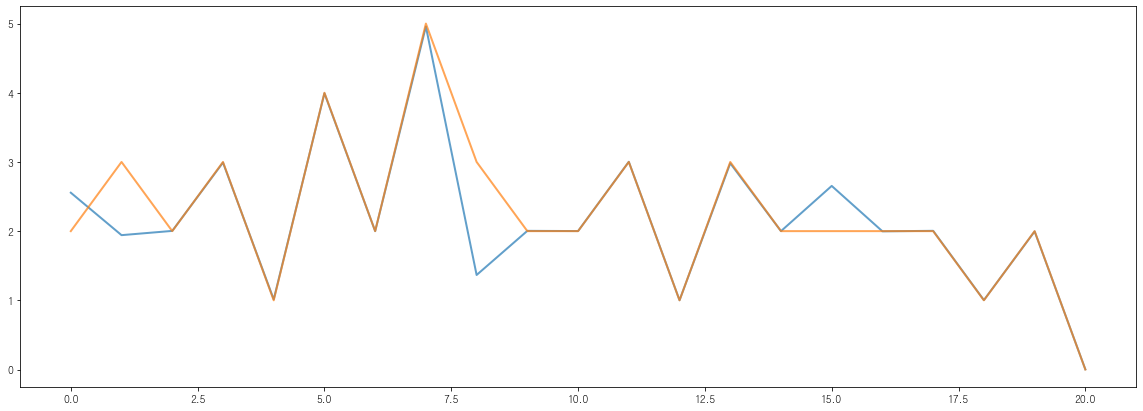

In [104]:
# 모델 성능 시각화

plt.pyplot.plot(model.predict(x_in),alpha = 0.7,linewidth = 2)
# 파란색 : 예측값
# 주황색 : 실제값
# 갈색 : 파란색과 주황색이 겹치는 부분
plt.pyplot.plot(x_out.values,alpha = 0.7,linewidth = 2)

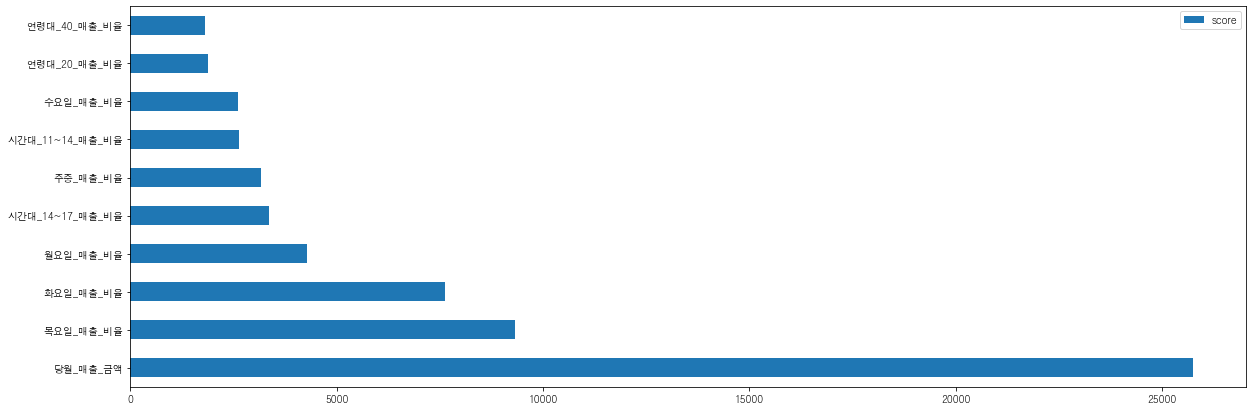

In [105]:
# 중요도 시각화

feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
plt.rcParams["figure.figsize"] = (20,7)
data_50 = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data_50[:10].plot(kind='barh')

In [106]:
model.predict(x_predict)

array([0.00255412], dtype=float32)

In [68]:
# 폐업률을 생존율로 변환


x_out

0     2
1     3
2     2
3     3
4     1
5     4
6     2
7     5
8     3
9     2
10    2
11    3
12    1
13    3
14    2
15    2
16    2
17    2
18    1
19    2
20    0
Name: 폐업_률, dtype: object

In [69]:
total = 100
x_out = total - x_out

In [70]:
total = 100
x_out

0      98
1      97
2      98
3      97
4      99
5      96
6      98
7      95
8      97
9      98
10     98
11     97
12     99
13     97
14     98
15     98
16     98
17     98
18     99
19     98
20    100
Name: 폐업_률, dtype: object

In [71]:
# train, test 데이터 
X_train, X_test, y_train, y_test= train_test_split(x_in, x_out, test_size=0.2, random_state=42)

In [72]:
# xgboost 학습

model = XGBRegressor(booster="gbtree", objective ='reg:squarederror', n_estimators=12000, learning_rate=0.001 ,
                      max_depth=12, n_jobs = -1,subsample=0.75, reg_lambda=1, colsample_bytree=1, gamma=0, )

eval_set = [(X_test, y_test)]

model.fit(X_train,y_train, eval_set=eval_set, verbose=True)

pred_y = model.predict(X_test)

#predictions = [round(value) for value in xgb_5000_명동_pred ]
# evaluate predictions

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

[0]	validation_0-rmse:97.01154
[1]	validation_0-rmse:96.92170
[2]	validation_0-rmse:96.83066
[3]	validation_0-rmse:96.74098
[4]	validation_0-rmse:96.65093
[5]	validation_0-rmse:96.56246
[6]	validation_0-rmse:96.47311
[7]	validation_0-rmse:96.38284
[8]	validation_0-rmse:96.29359
[9]	validation_0-rmse:96.20495
[10]	validation_0-rmse:96.11492
[11]	validation_0-rmse:96.02653
[12]	validation_0-rmse:95.93660
[13]	validation_0-rmse:95.84847
[14]	validation_0-rmse:95.75854
[15]	validation_0-rmse:95.66823
[16]	validation_0-rmse:95.58283
[17]	validation_0-rmse:95.49655
[18]	validation_0-rmse:95.40865
[19]	validation_0-rmse:95.32091
[20]	validation_0-rmse:95.23270
[21]	validation_0-rmse:95.14324
[22]	validation_0-rmse:95.05591
[23]	validation_0-rmse:94.96819
[24]	validation_0-rmse:94.87985
[25]	validation_0-rmse:94.79242
[26]	validation_0-rmse:94.70358
[27]	validation_0-rmse:94.61548
[28]	validation_0-rmse:94.53017
[29]	validation_0-rmse:94.44231
[30]	validation_0-rmse:94.35460
[31]	validation_0-

[252]	validation_0-rmse:76.85886
[253]	validation_0-rmse:76.78932
[254]	validation_0-rmse:76.71748
[255]	validation_0-rmse:76.64564
[256]	validation_0-rmse:76.57502
[257]	validation_0-rmse:76.50504
[258]	validation_0-rmse:76.43540
[259]	validation_0-rmse:76.36413
[260]	validation_0-rmse:76.29343
[261]	validation_0-rmse:76.22243
[262]	validation_0-rmse:76.15171
[263]	validation_0-rmse:76.08076
[264]	validation_0-rmse:76.00959
[265]	validation_0-rmse:75.93988
[266]	validation_0-rmse:75.86871
[267]	validation_0-rmse:75.79838
[268]	validation_0-rmse:75.72806
[269]	validation_0-rmse:75.65817
[270]	validation_0-rmse:75.58732
[271]	validation_0-rmse:75.51691
[272]	validation_0-rmse:75.44849
[273]	validation_0-rmse:75.37999
[274]	validation_0-rmse:75.30907
[275]	validation_0-rmse:75.23862
[276]	validation_0-rmse:75.16928
[277]	validation_0-rmse:75.09946
[278]	validation_0-rmse:75.02992
[279]	validation_0-rmse:74.95965
[280]	validation_0-rmse:74.89099
[281]	validation_0-rmse:74.82353
[282]	vali

[501]	validation_0-rmse:61.05129
[502]	validation_0-rmse:60.99472
[503]	validation_0-rmse:60.93742
[504]	validation_0-rmse:60.88211
[505]	validation_0-rmse:60.82659
[506]	validation_0-rmse:60.76965
[507]	validation_0-rmse:60.71307
[508]	validation_0-rmse:60.65697
[509]	validation_0-rmse:60.60076
[510]	validation_0-rmse:60.54446
[511]	validation_0-rmse:60.48877
[512]	validation_0-rmse:60.43295
[513]	validation_0-rmse:60.37611
[514]	validation_0-rmse:60.32040
[515]	validation_0-rmse:60.26416
[516]	validation_0-rmse:60.20748
[517]	validation_0-rmse:60.15098
[518]	validation_0-rmse:60.09467
[519]	validation_0-rmse:60.03978
[520]	validation_0-rmse:59.98454
[521]	validation_0-rmse:59.92956
[522]	validation_0-rmse:59.87347
[523]	validation_0-rmse:59.81783
[524]	validation_0-rmse:59.76241
[525]	validation_0-rmse:59.70754
[526]	validation_0-rmse:59.65171
[527]	validation_0-rmse:59.59721
[528]	validation_0-rmse:59.54221
[529]	validation_0-rmse:59.48681
[530]	validation_0-rmse:59.43149
[531]	vali

[750]	validation_0-rmse:48.48498
[751]	validation_0-rmse:48.43928
[752]	validation_0-rmse:48.39390
[753]	validation_0-rmse:48.34925
[754]	validation_0-rmse:48.30419
[755]	validation_0-rmse:48.25940
[756]	validation_0-rmse:48.21488
[757]	validation_0-rmse:48.16981
[758]	validation_0-rmse:48.12504
[759]	validation_0-rmse:48.08028
[760]	validation_0-rmse:48.03530
[761]	validation_0-rmse:47.99115
[762]	validation_0-rmse:47.94780
[763]	validation_0-rmse:47.90295
[764]	validation_0-rmse:47.85876
[765]	validation_0-rmse:47.81385
[766]	validation_0-rmse:47.76958
[767]	validation_0-rmse:47.72462
[768]	validation_0-rmse:47.67964
[769]	validation_0-rmse:47.63573
[770]	validation_0-rmse:47.59187
[771]	validation_0-rmse:47.54715
[772]	validation_0-rmse:47.50264
[773]	validation_0-rmse:47.45882
[774]	validation_0-rmse:47.41479
[775]	validation_0-rmse:47.37170
[776]	validation_0-rmse:47.32845
[777]	validation_0-rmse:47.28440
[778]	validation_0-rmse:47.24102
[779]	validation_0-rmse:47.19721
[780]	vali

[999]	validation_0-rmse:38.48831
[1000]	validation_0-rmse:38.45226
[1001]	validation_0-rmse:38.41627
[1002]	validation_0-rmse:38.38095
[1003]	validation_0-rmse:38.34539
[1004]	validation_0-rmse:38.31118
[1005]	validation_0-rmse:38.27518
[1006]	validation_0-rmse:38.23980
[1007]	validation_0-rmse:38.20523
[1008]	validation_0-rmse:38.17088
[1009]	validation_0-rmse:38.13498
[1010]	validation_0-rmse:38.09942
[1011]	validation_0-rmse:38.06488
[1012]	validation_0-rmse:38.02954
[1013]	validation_0-rmse:37.99448
[1014]	validation_0-rmse:37.95885
[1015]	validation_0-rmse:37.92319
[1016]	validation_0-rmse:37.88756
[1017]	validation_0-rmse:37.85261
[1018]	validation_0-rmse:37.81746
[1019]	validation_0-rmse:37.78234
[1020]	validation_0-rmse:37.74689
[1021]	validation_0-rmse:37.71162
[1022]	validation_0-rmse:37.67630
[1023]	validation_0-rmse:37.64166
[1024]	validation_0-rmse:37.60735
[1025]	validation_0-rmse:37.57191
[1026]	validation_0-rmse:37.53753
[1027]	validation_0-rmse:37.50326
[1028]	validati

[1240]	validation_0-rmse:30.78036
[1241]	validation_0-rmse:30.75230
[1242]	validation_0-rmse:30.72334
[1243]	validation_0-rmse:30.69444
[1244]	validation_0-rmse:30.66618
[1245]	validation_0-rmse:30.63879
[1246]	validation_0-rmse:30.61012
[1247]	validation_0-rmse:30.58211
[1248]	validation_0-rmse:30.55397
[1249]	validation_0-rmse:30.52630
[1250]	validation_0-rmse:30.49812
[1251]	validation_0-rmse:30.47032
[1252]	validation_0-rmse:30.44211
[1253]	validation_0-rmse:30.41391
[1254]	validation_0-rmse:30.38559
[1255]	validation_0-rmse:30.35726
[1256]	validation_0-rmse:30.32941
[1257]	validation_0-rmse:30.30120
[1258]	validation_0-rmse:30.27366
[1259]	validation_0-rmse:30.24572
[1260]	validation_0-rmse:30.21767
[1261]	validation_0-rmse:30.18939
[1262]	validation_0-rmse:30.16254
[1263]	validation_0-rmse:30.13449
[1264]	validation_0-rmse:30.10758
[1265]	validation_0-rmse:30.07971
[1266]	validation_0-rmse:30.05166
[1267]	validation_0-rmse:30.02466
[1268]	validation_0-rmse:29.99739
[1269]	validat

[1481]	validation_0-rmse:24.61273
[1482]	validation_0-rmse:24.58981
[1483]	validation_0-rmse:24.56682
[1484]	validation_0-rmse:24.54379
[1485]	validation_0-rmse:24.52078
[1486]	validation_0-rmse:24.49764
[1487]	validation_0-rmse:24.47491
[1488]	validation_0-rmse:24.45184
[1489]	validation_0-rmse:24.42892
[1490]	validation_0-rmse:24.40674
[1491]	validation_0-rmse:24.38526
[1492]	validation_0-rmse:24.36296
[1493]	validation_0-rmse:24.34092
[1494]	validation_0-rmse:24.31831
[1495]	validation_0-rmse:24.29566
[1496]	validation_0-rmse:24.27358
[1497]	validation_0-rmse:24.25075
[1498]	validation_0-rmse:24.22817
[1499]	validation_0-rmse:24.20538
[1500]	validation_0-rmse:24.18334
[1501]	validation_0-rmse:24.16107
[1502]	validation_0-rmse:24.13889
[1503]	validation_0-rmse:24.11660
[1504]	validation_0-rmse:24.09413
[1505]	validation_0-rmse:24.07191
[1506]	validation_0-rmse:24.05028
[1507]	validation_0-rmse:24.02795
[1508]	validation_0-rmse:24.00557
[1509]	validation_0-rmse:23.98280
[1510]	validat

[1722]	validation_0-rmse:19.66708
[1723]	validation_0-rmse:19.64850
[1724]	validation_0-rmse:19.63031
[1725]	validation_0-rmse:19.61179
[1726]	validation_0-rmse:19.59322
[1727]	validation_0-rmse:19.57490
[1728]	validation_0-rmse:19.55678
[1729]	validation_0-rmse:19.53833
[1730]	validation_0-rmse:19.52023
[1731]	validation_0-rmse:19.50204
[1732]	validation_0-rmse:19.48359
[1733]	validation_0-rmse:19.46563
[1734]	validation_0-rmse:19.44731
[1735]	validation_0-rmse:19.42975
[1736]	validation_0-rmse:19.41153
[1737]	validation_0-rmse:19.39371
[1738]	validation_0-rmse:19.37558
[1739]	validation_0-rmse:19.35738
[1740]	validation_0-rmse:19.33900
[1741]	validation_0-rmse:19.32063
[1742]	validation_0-rmse:19.30240
[1743]	validation_0-rmse:19.28468
[1744]	validation_0-rmse:19.26675
[1745]	validation_0-rmse:19.24892
[1746]	validation_0-rmse:19.23064
[1747]	validation_0-rmse:19.21261
[1748]	validation_0-rmse:19.19481
[1749]	validation_0-rmse:19.17691
[1750]	validation_0-rmse:19.15885
[1751]	validat

[1963]	validation_0-rmse:15.70606
[1964]	validation_0-rmse:15.69126
[1965]	validation_0-rmse:15.67665
[1966]	validation_0-rmse:15.66173
[1967]	validation_0-rmse:15.64683
[1968]	validation_0-rmse:15.63235
[1969]	validation_0-rmse:15.61797
[1970]	validation_0-rmse:15.60343
[1971]	validation_0-rmse:15.58867
[1972]	validation_0-rmse:15.57437
[1973]	validation_0-rmse:15.55947
[1974]	validation_0-rmse:15.54494
[1975]	validation_0-rmse:15.53054
[1976]	validation_0-rmse:15.51598
[1977]	validation_0-rmse:15.50150
[1978]	validation_0-rmse:15.48691
[1979]	validation_0-rmse:15.47238
[1980]	validation_0-rmse:15.45790
[1981]	validation_0-rmse:15.44319
[1982]	validation_0-rmse:15.42889
[1983]	validation_0-rmse:15.41431
[1984]	validation_0-rmse:15.39943
[1985]	validation_0-rmse:15.38509
[1986]	validation_0-rmse:15.37069
[1987]	validation_0-rmse:15.35620
[1988]	validation_0-rmse:15.34156
[1989]	validation_0-rmse:15.32689
[1990]	validation_0-rmse:15.31235
[1991]	validation_0-rmse:15.29813
[1992]	validat

[2204]	validation_0-rmse:12.53900
[2205]	validation_0-rmse:12.52708
[2206]	validation_0-rmse:12.51523
[2207]	validation_0-rmse:12.50353
[2208]	validation_0-rmse:12.49171
[2209]	validation_0-rmse:12.47990
[2210]	validation_0-rmse:12.46788
[2211]	validation_0-rmse:12.45616
[2212]	validation_0-rmse:12.44439
[2213]	validation_0-rmse:12.43255
[2214]	validation_0-rmse:12.42065
[2215]	validation_0-rmse:12.40898
[2216]	validation_0-rmse:12.39733
[2217]	validation_0-rmse:12.38561
[2218]	validation_0-rmse:12.37405
[2219]	validation_0-rmse:12.36221
[2220]	validation_0-rmse:12.35038
[2221]	validation_0-rmse:12.33917
[2222]	validation_0-rmse:12.32758
[2223]	validation_0-rmse:12.31592
[2224]	validation_0-rmse:12.30447
[2225]	validation_0-rmse:12.29268
[2226]	validation_0-rmse:12.28114
[2227]	validation_0-rmse:12.26938
[2228]	validation_0-rmse:12.25763
[2229]	validation_0-rmse:12.24619
[2230]	validation_0-rmse:12.23470
[2231]	validation_0-rmse:12.22299
[2232]	validation_0-rmse:12.21162
[2233]	validat

[2445]	validation_0-rmse:10.00164
[2446]	validation_0-rmse:9.99223
[2447]	validation_0-rmse:9.98322
[2448]	validation_0-rmse:9.97406
[2449]	validation_0-rmse:9.96467
[2450]	validation_0-rmse:9.95520
[2451]	validation_0-rmse:9.94608
[2452]	validation_0-rmse:9.93658
[2453]	validation_0-rmse:9.92714
[2454]	validation_0-rmse:9.91765
[2455]	validation_0-rmse:9.90830
[2456]	validation_0-rmse:9.89904
[2457]	validation_0-rmse:9.88996
[2458]	validation_0-rmse:9.88064
[2459]	validation_0-rmse:9.87100
[2460]	validation_0-rmse:9.86152
[2461]	validation_0-rmse:9.85223
[2462]	validation_0-rmse:9.84279
[2463]	validation_0-rmse:9.83345
[2464]	validation_0-rmse:9.82443
[2465]	validation_0-rmse:9.81524
[2466]	validation_0-rmse:9.80607
[2467]	validation_0-rmse:9.79683
[2468]	validation_0-rmse:9.78775
[2469]	validation_0-rmse:9.77871
[2470]	validation_0-rmse:9.76935
[2471]	validation_0-rmse:9.76014
[2472]	validation_0-rmse:9.75095
[2473]	validation_0-rmse:9.74193
[2474]	validation_0-rmse:9.73247
[2475]	va

[2694]	validation_0-rmse:7.91002
[2695]	validation_0-rmse:7.90245
[2696]	validation_0-rmse:7.89489
[2697]	validation_0-rmse:7.88714
[2698]	validation_0-rmse:7.87963
[2699]	validation_0-rmse:7.87216
[2700]	validation_0-rmse:7.86472
[2701]	validation_0-rmse:7.85714
[2702]	validation_0-rmse:7.85001
[2703]	validation_0-rmse:7.84272
[2704]	validation_0-rmse:7.83519
[2705]	validation_0-rmse:7.82762
[2706]	validation_0-rmse:7.82035
[2707]	validation_0-rmse:7.81309
[2708]	validation_0-rmse:7.80585
[2709]	validation_0-rmse:7.79842
[2710]	validation_0-rmse:7.79099
[2711]	validation_0-rmse:7.78330
[2712]	validation_0-rmse:7.77547
[2713]	validation_0-rmse:7.76795
[2714]	validation_0-rmse:7.76068
[2715]	validation_0-rmse:7.75323
[2716]	validation_0-rmse:7.74620
[2717]	validation_0-rmse:7.73893
[2718]	validation_0-rmse:7.73191
[2719]	validation_0-rmse:7.72453
[2720]	validation_0-rmse:7.71723
[2721]	validation_0-rmse:7.71000
[2722]	validation_0-rmse:7.70278
[2723]	validation_0-rmse:7.69538
[2724]	val

[2943]	validation_0-rmse:6.24962
[2944]	validation_0-rmse:6.24378
[2945]	validation_0-rmse:6.23789
[2946]	validation_0-rmse:6.23212
[2947]	validation_0-rmse:6.22626
[2948]	validation_0-rmse:6.22024
[2949]	validation_0-rmse:6.21429
[2950]	validation_0-rmse:6.20887
[2951]	validation_0-rmse:6.20281
[2952]	validation_0-rmse:6.19691
[2953]	validation_0-rmse:6.19066
[2954]	validation_0-rmse:6.18486
[2955]	validation_0-rmse:6.17885
[2956]	validation_0-rmse:6.17311
[2957]	validation_0-rmse:6.16763
[2958]	validation_0-rmse:6.16148
[2959]	validation_0-rmse:6.15528
[2960]	validation_0-rmse:6.14955
[2961]	validation_0-rmse:6.14335
[2962]	validation_0-rmse:6.13734
[2963]	validation_0-rmse:6.13162
[2964]	validation_0-rmse:6.12640
[2965]	validation_0-rmse:6.12066
[2966]	validation_0-rmse:6.11471
[2967]	validation_0-rmse:6.10900
[2968]	validation_0-rmse:6.10318
[2969]	validation_0-rmse:6.09699
[2970]	validation_0-rmse:6.09132
[2971]	validation_0-rmse:6.08568
[2972]	validation_0-rmse:6.07989
[2973]	val

[3192]	validation_0-rmse:4.91658
[3193]	validation_0-rmse:4.91179
[3194]	validation_0-rmse:4.90684
[3195]	validation_0-rmse:4.90247
[3196]	validation_0-rmse:4.89733
[3197]	validation_0-rmse:4.89297
[3198]	validation_0-rmse:4.88812
[3199]	validation_0-rmse:4.88331
[3200]	validation_0-rmse:4.87856
[3201]	validation_0-rmse:4.87395
[3202]	validation_0-rmse:4.86913
[3203]	validation_0-rmse:4.86421
[3204]	validation_0-rmse:4.85937
[3205]	validation_0-rmse:4.85464
[3206]	validation_0-rmse:4.84999
[3207]	validation_0-rmse:4.84502
[3208]	validation_0-rmse:4.84040
[3209]	validation_0-rmse:4.83556
[3210]	validation_0-rmse:4.83176
[3211]	validation_0-rmse:4.82730
[3212]	validation_0-rmse:4.82228
[3213]	validation_0-rmse:4.81745
[3214]	validation_0-rmse:4.81280
[3215]	validation_0-rmse:4.80796
[3216]	validation_0-rmse:4.80324
[3217]	validation_0-rmse:4.79860
[3218]	validation_0-rmse:4.79385
[3219]	validation_0-rmse:4.78908
[3220]	validation_0-rmse:4.78423
[3221]	validation_0-rmse:4.77936
[3222]	val

[3441]	validation_0-rmse:3.85161
[3442]	validation_0-rmse:3.84802
[3443]	validation_0-rmse:3.84451
[3444]	validation_0-rmse:3.84105
[3445]	validation_0-rmse:3.83747
[3446]	validation_0-rmse:3.83349
[3447]	validation_0-rmse:3.82962
[3448]	validation_0-rmse:3.82585
[3449]	validation_0-rmse:3.82215
[3450]	validation_0-rmse:3.81826
[3451]	validation_0-rmse:3.81477
[3452]	validation_0-rmse:3.81130
[3453]	validation_0-rmse:3.80762
[3454]	validation_0-rmse:3.80394
[3455]	validation_0-rmse:3.80026
[3456]	validation_0-rmse:3.79648
[3457]	validation_0-rmse:3.79250
[3458]	validation_0-rmse:3.78904
[3459]	validation_0-rmse:3.78556
[3460]	validation_0-rmse:3.78176
[3461]	validation_0-rmse:3.77782
[3462]	validation_0-rmse:3.77406
[3463]	validation_0-rmse:3.77013
[3464]	validation_0-rmse:3.76663
[3465]	validation_0-rmse:3.76304
[3466]	validation_0-rmse:3.76027
[3467]	validation_0-rmse:3.75677
[3468]	validation_0-rmse:3.75328
[3469]	validation_0-rmse:3.74970
[3470]	validation_0-rmse:3.74625
[3471]	val

[3690]	validation_0-rmse:3.04101
[3691]	validation_0-rmse:3.03828
[3692]	validation_0-rmse:3.03546
[3693]	validation_0-rmse:3.03267
[3694]	validation_0-rmse:3.02988
[3695]	validation_0-rmse:3.02753
[3696]	validation_0-rmse:3.02470
[3697]	validation_0-rmse:3.02144
[3698]	validation_0-rmse:3.01861
[3699]	validation_0-rmse:3.01534
[3700]	validation_0-rmse:3.01267
[3701]	validation_0-rmse:3.00973
[3702]	validation_0-rmse:3.00704
[3703]	validation_0-rmse:3.00395
[3704]	validation_0-rmse:3.00104
[3705]	validation_0-rmse:2.99828
[3706]	validation_0-rmse:2.99550
[3707]	validation_0-rmse:2.99268
[3708]	validation_0-rmse:2.98946
[3709]	validation_0-rmse:2.98671
[3710]	validation_0-rmse:2.98360
[3711]	validation_0-rmse:2.98092
[3712]	validation_0-rmse:2.97816
[3713]	validation_0-rmse:2.97494
[3714]	validation_0-rmse:2.97214
[3715]	validation_0-rmse:2.96940
[3716]	validation_0-rmse:2.96665
[3717]	validation_0-rmse:2.96394
[3718]	validation_0-rmse:2.96115
[3719]	validation_0-rmse:2.95796
[3720]	val

[3939]	validation_0-rmse:2.39912
[3940]	validation_0-rmse:2.39676
[3941]	validation_0-rmse:2.39449
[3942]	validation_0-rmse:2.39225
[3943]	validation_0-rmse:2.39011
[3944]	validation_0-rmse:2.38784
[3945]	validation_0-rmse:2.38595
[3946]	validation_0-rmse:2.38376
[3947]	validation_0-rmse:2.38156
[3948]	validation_0-rmse:2.37931
[3949]	validation_0-rmse:2.37719
[3950]	validation_0-rmse:2.37494
[3951]	validation_0-rmse:2.37275
[3952]	validation_0-rmse:2.37023
[3953]	validation_0-rmse:2.36761
[3954]	validation_0-rmse:2.36522
[3955]	validation_0-rmse:2.36297
[3956]	validation_0-rmse:2.36047
[3957]	validation_0-rmse:2.35873
[3958]	validation_0-rmse:2.35682
[3959]	validation_0-rmse:2.35465
[3960]	validation_0-rmse:2.35316
[3961]	validation_0-rmse:2.35114
[3962]	validation_0-rmse:2.34873
[3963]	validation_0-rmse:2.34625
[3964]	validation_0-rmse:2.34426
[3965]	validation_0-rmse:2.34194
[3966]	validation_0-rmse:2.33934
[3967]	validation_0-rmse:2.33665
[3968]	validation_0-rmse:2.33418
[3969]	val

[4188]	validation_0-rmse:1.90054
[4189]	validation_0-rmse:1.89891
[4190]	validation_0-rmse:1.89780
[4191]	validation_0-rmse:1.89613
[4192]	validation_0-rmse:1.89419
[4193]	validation_0-rmse:1.89275
[4194]	validation_0-rmse:1.89057
[4195]	validation_0-rmse:1.88837
[4196]	validation_0-rmse:1.88651
[4197]	validation_0-rmse:1.88502
[4198]	validation_0-rmse:1.88322
[4199]	validation_0-rmse:1.88140
[4200]	validation_0-rmse:1.87963
[4201]	validation_0-rmse:1.87777
[4202]	validation_0-rmse:1.87630
[4203]	validation_0-rmse:1.87486
[4204]	validation_0-rmse:1.87337
[4205]	validation_0-rmse:1.87173
[4206]	validation_0-rmse:1.86980
[4207]	validation_0-rmse:1.86800
[4208]	validation_0-rmse:1.86640
[4209]	validation_0-rmse:1.86447
[4210]	validation_0-rmse:1.86262
[4211]	validation_0-rmse:1.86092
[4212]	validation_0-rmse:1.85910
[4213]	validation_0-rmse:1.85750
[4214]	validation_0-rmse:1.85570
[4215]	validation_0-rmse:1.85400
[4216]	validation_0-rmse:1.85224
[4217]	validation_0-rmse:1.85010
[4218]	val

[4437]	validation_0-rmse:1.52139
[4438]	validation_0-rmse:1.51997
[4439]	validation_0-rmse:1.51880
[4440]	validation_0-rmse:1.51761
[4441]	validation_0-rmse:1.51639
[4442]	validation_0-rmse:1.51499
[4443]	validation_0-rmse:1.51344
[4444]	validation_0-rmse:1.51211
[4445]	validation_0-rmse:1.51079
[4446]	validation_0-rmse:1.50946
[4447]	validation_0-rmse:1.50781
[4448]	validation_0-rmse:1.50673
[4449]	validation_0-rmse:1.50562
[4450]	validation_0-rmse:1.50444
[4451]	validation_0-rmse:1.50331
[4452]	validation_0-rmse:1.50192
[4453]	validation_0-rmse:1.50075
[4454]	validation_0-rmse:1.49934
[4455]	validation_0-rmse:1.49827
[4456]	validation_0-rmse:1.49724
[4457]	validation_0-rmse:1.49542
[4458]	validation_0-rmse:1.49398
[4459]	validation_0-rmse:1.49296
[4460]	validation_0-rmse:1.49175
[4461]	validation_0-rmse:1.49047
[4462]	validation_0-rmse:1.48908
[4463]	validation_0-rmse:1.48822
[4464]	validation_0-rmse:1.48703
[4465]	validation_0-rmse:1.48606
[4466]	validation_0-rmse:1.48475
[4467]	val

[4686]	validation_0-rmse:1.23771
[4687]	validation_0-rmse:1.23658
[4688]	validation_0-rmse:1.23554
[4689]	validation_0-rmse:1.23447
[4690]	validation_0-rmse:1.23364
[4691]	validation_0-rmse:1.23245
[4692]	validation_0-rmse:1.23148
[4693]	validation_0-rmse:1.23098
[4694]	validation_0-rmse:1.23004
[4695]	validation_0-rmse:1.22907
[4696]	validation_0-rmse:1.22778
[4697]	validation_0-rmse:1.22684
[4698]	validation_0-rmse:1.22579
[4699]	validation_0-rmse:1.22479
[4700]	validation_0-rmse:1.22375
[4701]	validation_0-rmse:1.22283
[4702]	validation_0-rmse:1.22205
[4703]	validation_0-rmse:1.22083
[4704]	validation_0-rmse:1.22012
[4705]	validation_0-rmse:1.21931
[4706]	validation_0-rmse:1.21840
[4707]	validation_0-rmse:1.21744
[4708]	validation_0-rmse:1.21622
[4709]	validation_0-rmse:1.21535
[4710]	validation_0-rmse:1.21454
[4711]	validation_0-rmse:1.21365
[4712]	validation_0-rmse:1.21222
[4713]	validation_0-rmse:1.21103
[4714]	validation_0-rmse:1.21011
[4715]	validation_0-rmse:1.20881
[4716]	val

[4935]	validation_0-rmse:1.03866
[4936]	validation_0-rmse:1.03786
[4937]	validation_0-rmse:1.03714
[4938]	validation_0-rmse:1.03669
[4939]	validation_0-rmse:1.03603
[4940]	validation_0-rmse:1.03533
[4941]	validation_0-rmse:1.03452
[4942]	validation_0-rmse:1.03368
[4943]	validation_0-rmse:1.03260
[4944]	validation_0-rmse:1.03209
[4945]	validation_0-rmse:1.03144
[4946]	validation_0-rmse:1.03079
[4947]	validation_0-rmse:1.03016
[4948]	validation_0-rmse:1.02953
[4949]	validation_0-rmse:1.02880
[4950]	validation_0-rmse:1.02803
[4951]	validation_0-rmse:1.02756
[4952]	validation_0-rmse:1.02691
[4953]	validation_0-rmse:1.02644
[4954]	validation_0-rmse:1.02583
[4955]	validation_0-rmse:1.02540
[4956]	validation_0-rmse:1.02477
[4957]	validation_0-rmse:1.02393
[4958]	validation_0-rmse:1.02299
[4959]	validation_0-rmse:1.02233
[4960]	validation_0-rmse:1.02171
[4961]	validation_0-rmse:1.02121
[4962]	validation_0-rmse:1.02041
[4963]	validation_0-rmse:1.01964
[4964]	validation_0-rmse:1.01899
[4965]	val

[5184]	validation_0-rmse:0.90081
[5185]	validation_0-rmse:0.90026
[5186]	validation_0-rmse:0.89974
[5187]	validation_0-rmse:0.89941
[5188]	validation_0-rmse:0.89859
[5189]	validation_0-rmse:0.89821
[5190]	validation_0-rmse:0.89744
[5191]	validation_0-rmse:0.89655
[5192]	validation_0-rmse:0.89604
[5193]	validation_0-rmse:0.89575
[5194]	validation_0-rmse:0.89525
[5195]	validation_0-rmse:0.89489
[5196]	validation_0-rmse:0.89425
[5197]	validation_0-rmse:0.89408
[5198]	validation_0-rmse:0.89376
[5199]	validation_0-rmse:0.89353
[5200]	validation_0-rmse:0.89332
[5201]	validation_0-rmse:0.89316
[5202]	validation_0-rmse:0.89278
[5203]	validation_0-rmse:0.89233
[5204]	validation_0-rmse:0.89176
[5205]	validation_0-rmse:0.89109
[5206]	validation_0-rmse:0.89060
[5207]	validation_0-rmse:0.89012
[5208]	validation_0-rmse:0.88978
[5209]	validation_0-rmse:0.88935
[5210]	validation_0-rmse:0.88890
[5211]	validation_0-rmse:0.88874
[5212]	validation_0-rmse:0.88853
[5213]	validation_0-rmse:0.88830
[5214]	val

[5433]	validation_0-rmse:0.81862
[5434]	validation_0-rmse:0.81833
[5435]	validation_0-rmse:0.81819
[5436]	validation_0-rmse:0.81798
[5437]	validation_0-rmse:0.81722
[5438]	validation_0-rmse:0.81696
[5439]	validation_0-rmse:0.81663
[5440]	validation_0-rmse:0.81640
[5441]	validation_0-rmse:0.81591
[5442]	validation_0-rmse:0.81591
[5443]	validation_0-rmse:0.81561
[5444]	validation_0-rmse:0.81536
[5445]	validation_0-rmse:0.81534
[5446]	validation_0-rmse:0.81458
[5447]	validation_0-rmse:0.81433
[5448]	validation_0-rmse:0.81422
[5449]	validation_0-rmse:0.81394
[5450]	validation_0-rmse:0.81354
[5451]	validation_0-rmse:0.81340
[5452]	validation_0-rmse:0.81336
[5453]	validation_0-rmse:0.81332
[5454]	validation_0-rmse:0.81326
[5455]	validation_0-rmse:0.81303
[5456]	validation_0-rmse:0.81268
[5457]	validation_0-rmse:0.81264
[5458]	validation_0-rmse:0.81252
[5459]	validation_0-rmse:0.81249
[5460]	validation_0-rmse:0.81250
[5461]	validation_0-rmse:0.81219
[5462]	validation_0-rmse:0.81212
[5463]	val

[5682]	validation_0-rmse:0.77403
[5683]	validation_0-rmse:0.77411
[5684]	validation_0-rmse:0.77410
[5685]	validation_0-rmse:0.77424
[5686]	validation_0-rmse:0.77417
[5687]	validation_0-rmse:0.77419
[5688]	validation_0-rmse:0.77412
[5689]	validation_0-rmse:0.77397
[5690]	validation_0-rmse:0.77407
[5691]	validation_0-rmse:0.77393
[5692]	validation_0-rmse:0.77387
[5693]	validation_0-rmse:0.77389
[5694]	validation_0-rmse:0.77386
[5695]	validation_0-rmse:0.77376
[5696]	validation_0-rmse:0.77327
[5697]	validation_0-rmse:0.77306
[5698]	validation_0-rmse:0.77281
[5699]	validation_0-rmse:0.77267
[5700]	validation_0-rmse:0.77265
[5701]	validation_0-rmse:0.77250
[5702]	validation_0-rmse:0.77229
[5703]	validation_0-rmse:0.77220
[5704]	validation_0-rmse:0.77205
[5705]	validation_0-rmse:0.77189
[5706]	validation_0-rmse:0.77169
[5707]	validation_0-rmse:0.77160
[5708]	validation_0-rmse:0.77137
[5709]	validation_0-rmse:0.77145
[5710]	validation_0-rmse:0.77115
[5711]	validation_0-rmse:0.77123
[5712]	val

[5931]	validation_0-rmse:0.75252
[5932]	validation_0-rmse:0.75239
[5933]	validation_0-rmse:0.75203
[5934]	validation_0-rmse:0.75192
[5935]	validation_0-rmse:0.75183
[5936]	validation_0-rmse:0.75195
[5937]	validation_0-rmse:0.75204
[5938]	validation_0-rmse:0.75206
[5939]	validation_0-rmse:0.75223
[5940]	validation_0-rmse:0.75179
[5941]	validation_0-rmse:0.75154
[5942]	validation_0-rmse:0.75130
[5943]	validation_0-rmse:0.75104
[5944]	validation_0-rmse:0.75101
[5945]	validation_0-rmse:0.75089
[5946]	validation_0-rmse:0.75091
[5947]	validation_0-rmse:0.75101
[5948]	validation_0-rmse:0.75064
[5949]	validation_0-rmse:0.75015
[5950]	validation_0-rmse:0.75025
[5951]	validation_0-rmse:0.75011
[5952]	validation_0-rmse:0.75011
[5953]	validation_0-rmse:0.75022
[5954]	validation_0-rmse:0.75014
[5955]	validation_0-rmse:0.75027
[5956]	validation_0-rmse:0.74980
[5957]	validation_0-rmse:0.74974
[5958]	validation_0-rmse:0.74934
[5959]	validation_0-rmse:0.74946
[5960]	validation_0-rmse:0.74934
[5961]	val

[6180]	validation_0-rmse:0.73849
[6181]	validation_0-rmse:0.73859
[6182]	validation_0-rmse:0.73851
[6183]	validation_0-rmse:0.73872
[6184]	validation_0-rmse:0.73863
[6185]	validation_0-rmse:0.73854
[6186]	validation_0-rmse:0.73858
[6187]	validation_0-rmse:0.73848
[6188]	validation_0-rmse:0.73846
[6189]	validation_0-rmse:0.73841
[6190]	validation_0-rmse:0.73840
[6191]	validation_0-rmse:0.73860
[6192]	validation_0-rmse:0.73851
[6193]	validation_0-rmse:0.73864
[6194]	validation_0-rmse:0.73879
[6195]	validation_0-rmse:0.73846
[6196]	validation_0-rmse:0.73837
[6197]	validation_0-rmse:0.73832
[6198]	validation_0-rmse:0.73830
[6199]	validation_0-rmse:0.73804
[6200]	validation_0-rmse:0.73804
[6201]	validation_0-rmse:0.73786
[6202]	validation_0-rmse:0.73805
[6203]	validation_0-rmse:0.73817
[6204]	validation_0-rmse:0.73836
[6205]	validation_0-rmse:0.73830
[6206]	validation_0-rmse:0.73844
[6207]	validation_0-rmse:0.73855
[6208]	validation_0-rmse:0.73849
[6209]	validation_0-rmse:0.73869
[6210]	val

[6429]	validation_0-rmse:0.73719
[6430]	validation_0-rmse:0.73714
[6431]	validation_0-rmse:0.73711
[6432]	validation_0-rmse:0.73711
[6433]	validation_0-rmse:0.73710
[6434]	validation_0-rmse:0.73710
[6435]	validation_0-rmse:0.73713
[6436]	validation_0-rmse:0.73694
[6437]	validation_0-rmse:0.73692
[6438]	validation_0-rmse:0.73675
[6439]	validation_0-rmse:0.73680
[6440]	validation_0-rmse:0.73680
[6441]	validation_0-rmse:0.73649
[6442]	validation_0-rmse:0.73619
[6443]	validation_0-rmse:0.73636
[6444]	validation_0-rmse:0.73655
[6445]	validation_0-rmse:0.73654
[6446]	validation_0-rmse:0.73658
[6447]	validation_0-rmse:0.73655
[6448]	validation_0-rmse:0.73676
[6449]	validation_0-rmse:0.73659
[6450]	validation_0-rmse:0.73655
[6451]	validation_0-rmse:0.73674
[6452]	validation_0-rmse:0.73662
[6453]	validation_0-rmse:0.73634
[6454]	validation_0-rmse:0.73637
[6455]	validation_0-rmse:0.73640
[6456]	validation_0-rmse:0.73637
[6457]	validation_0-rmse:0.73640
[6458]	validation_0-rmse:0.73640
[6459]	val

[6678]	validation_0-rmse:0.73677
[6679]	validation_0-rmse:0.73690
[6680]	validation_0-rmse:0.73710
[6681]	validation_0-rmse:0.73713
[6682]	validation_0-rmse:0.73715
[6683]	validation_0-rmse:0.73708
[6684]	validation_0-rmse:0.73717
[6685]	validation_0-rmse:0.73739
[6686]	validation_0-rmse:0.73739
[6687]	validation_0-rmse:0.73735
[6688]	validation_0-rmse:0.73730
[6689]	validation_0-rmse:0.73719
[6690]	validation_0-rmse:0.73720
[6691]	validation_0-rmse:0.73715
[6692]	validation_0-rmse:0.73727
[6693]	validation_0-rmse:0.73722
[6694]	validation_0-rmse:0.73743
[6695]	validation_0-rmse:0.73728
[6696]	validation_0-rmse:0.73727
[6697]	validation_0-rmse:0.73746
[6698]	validation_0-rmse:0.73749
[6699]	validation_0-rmse:0.73754
[6700]	validation_0-rmse:0.73774
[6701]	validation_0-rmse:0.73771
[6702]	validation_0-rmse:0.73791
[6703]	validation_0-rmse:0.73779
[6704]	validation_0-rmse:0.73779
[6705]	validation_0-rmse:0.73768
[6706]	validation_0-rmse:0.73773
[6707]	validation_0-rmse:0.73792
[6708]	val

[6927]	validation_0-rmse:0.73757
[6928]	validation_0-rmse:0.73753
[6929]	validation_0-rmse:0.73752
[6930]	validation_0-rmse:0.73771
[6931]	validation_0-rmse:0.73776
[6932]	validation_0-rmse:0.73786
[6933]	validation_0-rmse:0.73787
[6934]	validation_0-rmse:0.73787
[6935]	validation_0-rmse:0.73807
[6936]	validation_0-rmse:0.73826
[6937]	validation_0-rmse:0.73842
[6938]	validation_0-rmse:0.73829
[6939]	validation_0-rmse:0.73812
[6940]	validation_0-rmse:0.73812
[6941]	validation_0-rmse:0.73816
[6942]	validation_0-rmse:0.73813
[6943]	validation_0-rmse:0.73810
[6944]	validation_0-rmse:0.73803
[6945]	validation_0-rmse:0.73820
[6946]	validation_0-rmse:0.73840
[6947]	validation_0-rmse:0.73837
[6948]	validation_0-rmse:0.73849
[6949]	validation_0-rmse:0.73846
[6950]	validation_0-rmse:0.73845
[6951]	validation_0-rmse:0.73842
[6952]	validation_0-rmse:0.73840
[6953]	validation_0-rmse:0.73837
[6954]	validation_0-rmse:0.73835
[6955]	validation_0-rmse:0.73833
[6956]	validation_0-rmse:0.73834
[6957]	val

[7176]	validation_0-rmse:0.73743
[7177]	validation_0-rmse:0.73726
[7178]	validation_0-rmse:0.73732
[7179]	validation_0-rmse:0.73723
[7180]	validation_0-rmse:0.73734
[7181]	validation_0-rmse:0.73746
[7182]	validation_0-rmse:0.73764
[7183]	validation_0-rmse:0.73748
[7184]	validation_0-rmse:0.73754
[7185]	validation_0-rmse:0.73751
[7186]	validation_0-rmse:0.73769
[7187]	validation_0-rmse:0.73786
[7188]	validation_0-rmse:0.73783
[7189]	validation_0-rmse:0.73794
[7190]	validation_0-rmse:0.73785
[7191]	validation_0-rmse:0.73780
[7192]	validation_0-rmse:0.73771
[7193]	validation_0-rmse:0.73779
[7194]	validation_0-rmse:0.73765
[7195]	validation_0-rmse:0.73763
[7196]	validation_0-rmse:0.73769
[7197]	validation_0-rmse:0.73768
[7198]	validation_0-rmse:0.73766
[7199]	validation_0-rmse:0.73749
[7200]	validation_0-rmse:0.73740
[7201]	validation_0-rmse:0.73731
[7202]	validation_0-rmse:0.73735
[7203]	validation_0-rmse:0.73734
[7204]	validation_0-rmse:0.73741
[7205]	validation_0-rmse:0.73733
[7206]	val

[7425]	validation_0-rmse:0.73842
[7426]	validation_0-rmse:0.73840
[7427]	validation_0-rmse:0.73846
[7428]	validation_0-rmse:0.73858
[7429]	validation_0-rmse:0.73853
[7430]	validation_0-rmse:0.73845
[7431]	validation_0-rmse:0.73841
[7432]	validation_0-rmse:0.73835
[7433]	validation_0-rmse:0.73821
[7434]	validation_0-rmse:0.73818
[7435]	validation_0-rmse:0.73825
[7436]	validation_0-rmse:0.73824
[7437]	validation_0-rmse:0.73821
[7438]	validation_0-rmse:0.73821
[7439]	validation_0-rmse:0.73838
[7440]	validation_0-rmse:0.73842
[7441]	validation_0-rmse:0.73835
[7442]	validation_0-rmse:0.73848
[7443]	validation_0-rmse:0.73855
[7444]	validation_0-rmse:0.73843
[7445]	validation_0-rmse:0.73853
[7446]	validation_0-rmse:0.73851
[7447]	validation_0-rmse:0.73847
[7448]	validation_0-rmse:0.73858
[7449]	validation_0-rmse:0.73870
[7450]	validation_0-rmse:0.73863
[7451]	validation_0-rmse:0.73879
[7452]	validation_0-rmse:0.73881
[7453]	validation_0-rmse:0.73880
[7454]	validation_0-rmse:0.73890
[7455]	val

[7674]	validation_0-rmse:0.74103
[7675]	validation_0-rmse:0.74096
[7676]	validation_0-rmse:0.74098
[7677]	validation_0-rmse:0.74102
[7678]	validation_0-rmse:0.74099
[7679]	validation_0-rmse:0.74113
[7680]	validation_0-rmse:0.74128
[7681]	validation_0-rmse:0.74126
[7682]	validation_0-rmse:0.74119
[7683]	validation_0-rmse:0.74123
[7684]	validation_0-rmse:0.74122
[7685]	validation_0-rmse:0.74116
[7686]	validation_0-rmse:0.74115
[7687]	validation_0-rmse:0.74104
[7688]	validation_0-rmse:0.74114
[7689]	validation_0-rmse:0.74108
[7690]	validation_0-rmse:0.74106
[7691]	validation_0-rmse:0.74102
[7692]	validation_0-rmse:0.74110
[7693]	validation_0-rmse:0.74125
[7694]	validation_0-rmse:0.74119
[7695]	validation_0-rmse:0.74131
[7696]	validation_0-rmse:0.74135
[7697]	validation_0-rmse:0.74143
[7698]	validation_0-rmse:0.74136
[7699]	validation_0-rmse:0.74127
[7700]	validation_0-rmse:0.74134
[7701]	validation_0-rmse:0.74127
[7702]	validation_0-rmse:0.74121
[7703]	validation_0-rmse:0.74119
[7704]	val

[7923]	validation_0-rmse:0.74301
[7924]	validation_0-rmse:0.74316
[7925]	validation_0-rmse:0.74313
[7926]	validation_0-rmse:0.74317
[7927]	validation_0-rmse:0.74307
[7928]	validation_0-rmse:0.74301
[7929]	validation_0-rmse:0.74304
[7930]	validation_0-rmse:0.74310
[7931]	validation_0-rmse:0.74303
[7932]	validation_0-rmse:0.74315
[7933]	validation_0-rmse:0.74308
[7934]	validation_0-rmse:0.74306
[7935]	validation_0-rmse:0.74314
[7936]	validation_0-rmse:0.74318
[7937]	validation_0-rmse:0.74323
[7938]	validation_0-rmse:0.74318
[7939]	validation_0-rmse:0.74313
[7940]	validation_0-rmse:0.74323
[7941]	validation_0-rmse:0.74320
[7942]	validation_0-rmse:0.74314
[7943]	validation_0-rmse:0.74312
[7944]	validation_0-rmse:0.74318
[7945]	validation_0-rmse:0.74324
[7946]	validation_0-rmse:0.74322
[7947]	validation_0-rmse:0.74317
[7948]	validation_0-rmse:0.74324
[7949]	validation_0-rmse:0.74319
[7950]	validation_0-rmse:0.74320
[7951]	validation_0-rmse:0.74318
[7952]	validation_0-rmse:0.74320
[7953]	val

[8172]	validation_0-rmse:0.74401
[8173]	validation_0-rmse:0.74397
[8174]	validation_0-rmse:0.74395
[8175]	validation_0-rmse:0.74402
[8176]	validation_0-rmse:0.74406
[8177]	validation_0-rmse:0.74402
[8178]	validation_0-rmse:0.74400
[8179]	validation_0-rmse:0.74408
[8180]	validation_0-rmse:0.74414
[8181]	validation_0-rmse:0.74418
[8182]	validation_0-rmse:0.74426
[8183]	validation_0-rmse:0.74421
[8184]	validation_0-rmse:0.74427
[8185]	validation_0-rmse:0.74440
[8186]	validation_0-rmse:0.74435
[8187]	validation_0-rmse:0.74437
[8188]	validation_0-rmse:0.74441
[8189]	validation_0-rmse:0.74447
[8190]	validation_0-rmse:0.74442
[8191]	validation_0-rmse:0.74445
[8192]	validation_0-rmse:0.74439
[8193]	validation_0-rmse:0.74439
[8194]	validation_0-rmse:0.74445
[8195]	validation_0-rmse:0.74443
[8196]	validation_0-rmse:0.74457
[8197]	validation_0-rmse:0.74453
[8198]	validation_0-rmse:0.74455
[8199]	validation_0-rmse:0.74454
[8200]	validation_0-rmse:0.74456
[8201]	validation_0-rmse:0.74451
[8202]	val

[8421]	validation_0-rmse:0.74421
[8422]	validation_0-rmse:0.74419
[8423]	validation_0-rmse:0.74426
[8424]	validation_0-rmse:0.74424
[8425]	validation_0-rmse:0.74419
[8426]	validation_0-rmse:0.74411
[8427]	validation_0-rmse:0.74408
[8428]	validation_0-rmse:0.74405
[8429]	validation_0-rmse:0.74402
[8430]	validation_0-rmse:0.74400
[8431]	validation_0-rmse:0.74398
[8432]	validation_0-rmse:0.74396
[8433]	validation_0-rmse:0.74389
[8434]	validation_0-rmse:0.74390
[8435]	validation_0-rmse:0.74389
[8436]	validation_0-rmse:0.74383
[8437]	validation_0-rmse:0.74389
[8438]	validation_0-rmse:0.74391
[8439]	validation_0-rmse:0.74388
[8440]	validation_0-rmse:0.74386
[8441]	validation_0-rmse:0.74390
[8442]	validation_0-rmse:0.74386
[8443]	validation_0-rmse:0.74386
[8444]	validation_0-rmse:0.74386
[8445]	validation_0-rmse:0.74380
[8446]	validation_0-rmse:0.74378
[8447]	validation_0-rmse:0.74381
[8448]	validation_0-rmse:0.74382
[8449]	validation_0-rmse:0.74377
[8450]	validation_0-rmse:0.74375
[8451]	val

[8670]	validation_0-rmse:0.74508
[8671]	validation_0-rmse:0.74503
[8672]	validation_0-rmse:0.74501
[8673]	validation_0-rmse:0.74502
[8674]	validation_0-rmse:0.74500
[8675]	validation_0-rmse:0.74510
[8676]	validation_0-rmse:0.74514
[8677]	validation_0-rmse:0.74520
[8678]	validation_0-rmse:0.74521
[8679]	validation_0-rmse:0.74523
[8680]	validation_0-rmse:0.74522
[8681]	validation_0-rmse:0.74523
[8682]	validation_0-rmse:0.74526
[8683]	validation_0-rmse:0.74520
[8684]	validation_0-rmse:0.74515
[8685]	validation_0-rmse:0.74517
[8686]	validation_0-rmse:0.74515
[8687]	validation_0-rmse:0.74518
[8688]	validation_0-rmse:0.74527
[8689]	validation_0-rmse:0.74526
[8690]	validation_0-rmse:0.74522
[8691]	validation_0-rmse:0.74521
[8692]	validation_0-rmse:0.74517
[8693]	validation_0-rmse:0.74523
[8694]	validation_0-rmse:0.74522
[8695]	validation_0-rmse:0.74520
[8696]	validation_0-rmse:0.74519
[8697]	validation_0-rmse:0.74523
[8698]	validation_0-rmse:0.74530
[8699]	validation_0-rmse:0.74529
[8700]	val

[8919]	validation_0-rmse:0.74573
[8920]	validation_0-rmse:0.74584
[8921]	validation_0-rmse:0.74591
[8922]	validation_0-rmse:0.74592
[8923]	validation_0-rmse:0.74586
[8924]	validation_0-rmse:0.74581
[8925]	validation_0-rmse:0.74576
[8926]	validation_0-rmse:0.74585
[8927]	validation_0-rmse:0.74582
[8928]	validation_0-rmse:0.74583
[8929]	validation_0-rmse:0.74592
[8930]	validation_0-rmse:0.74594
[8931]	validation_0-rmse:0.74596
[8932]	validation_0-rmse:0.74592
[8933]	validation_0-rmse:0.74591
[8934]	validation_0-rmse:0.74595
[8935]	validation_0-rmse:0.74594
[8936]	validation_0-rmse:0.74599
[8937]	validation_0-rmse:0.74600
[8938]	validation_0-rmse:0.74595
[8939]	validation_0-rmse:0.74596
[8940]	validation_0-rmse:0.74595
[8941]	validation_0-rmse:0.74594
[8942]	validation_0-rmse:0.74593
[8943]	validation_0-rmse:0.74594
[8944]	validation_0-rmse:0.74595
[8945]	validation_0-rmse:0.74600
[8946]	validation_0-rmse:0.74598
[8947]	validation_0-rmse:0.74602
[8948]	validation_0-rmse:0.74611
[8949]	val

[9168]	validation_0-rmse:0.74674
[9169]	validation_0-rmse:0.74672
[9170]	validation_0-rmse:0.74669
[9171]	validation_0-rmse:0.74664
[9172]	validation_0-rmse:0.74660
[9173]	validation_0-rmse:0.74659
[9174]	validation_0-rmse:0.74660
[9175]	validation_0-rmse:0.74658
[9176]	validation_0-rmse:0.74658
[9177]	validation_0-rmse:0.74659
[9178]	validation_0-rmse:0.74659
[9179]	validation_0-rmse:0.74657
[9180]	validation_0-rmse:0.74657
[9181]	validation_0-rmse:0.74657
[9182]	validation_0-rmse:0.74659
[9183]	validation_0-rmse:0.74666
[9184]	validation_0-rmse:0.74662
[9185]	validation_0-rmse:0.74664
[9186]	validation_0-rmse:0.74662
[9187]	validation_0-rmse:0.74670
[9188]	validation_0-rmse:0.74670
[9189]	validation_0-rmse:0.74670
[9190]	validation_0-rmse:0.74666
[9191]	validation_0-rmse:0.74666
[9192]	validation_0-rmse:0.74664
[9193]	validation_0-rmse:0.74672
[9194]	validation_0-rmse:0.74680
[9195]	validation_0-rmse:0.74681
[9196]	validation_0-rmse:0.74682
[9197]	validation_0-rmse:0.74677
[9198]	val

[9417]	validation_0-rmse:0.74810
[9418]	validation_0-rmse:0.74810
[9419]	validation_0-rmse:0.74811
[9420]	validation_0-rmse:0.74814
[9421]	validation_0-rmse:0.74814
[9422]	validation_0-rmse:0.74812
[9423]	validation_0-rmse:0.74816
[9424]	validation_0-rmse:0.74821
[9425]	validation_0-rmse:0.74817
[9426]	validation_0-rmse:0.74816
[9427]	validation_0-rmse:0.74815
[9428]	validation_0-rmse:0.74817
[9429]	validation_0-rmse:0.74814
[9430]	validation_0-rmse:0.74810
[9431]	validation_0-rmse:0.74806
[9432]	validation_0-rmse:0.74809
[9433]	validation_0-rmse:0.74809
[9434]	validation_0-rmse:0.74808
[9435]	validation_0-rmse:0.74809
[9436]	validation_0-rmse:0.74808
[9437]	validation_0-rmse:0.74806
[9438]	validation_0-rmse:0.74807
[9439]	validation_0-rmse:0.74811
[9440]	validation_0-rmse:0.74809
[9441]	validation_0-rmse:0.74812
[9442]	validation_0-rmse:0.74810
[9443]	validation_0-rmse:0.74811
[9444]	validation_0-rmse:0.74811
[9445]	validation_0-rmse:0.74808
[9446]	validation_0-rmse:0.74815
[9447]	val

[9666]	validation_0-rmse:0.74861
[9667]	validation_0-rmse:0.74862
[9668]	validation_0-rmse:0.74861
[9669]	validation_0-rmse:0.74865
[9670]	validation_0-rmse:0.74866
[9671]	validation_0-rmse:0.74867
[9672]	validation_0-rmse:0.74865
[9673]	validation_0-rmse:0.74864
[9674]	validation_0-rmse:0.74863
[9675]	validation_0-rmse:0.74865
[9676]	validation_0-rmse:0.74866
[9677]	validation_0-rmse:0.74865
[9678]	validation_0-rmse:0.74862
[9679]	validation_0-rmse:0.74864
[9680]	validation_0-rmse:0.74863
[9681]	validation_0-rmse:0.74865
[9682]	validation_0-rmse:0.74863
[9683]	validation_0-rmse:0.74862
[9684]	validation_0-rmse:0.74865
[9685]	validation_0-rmse:0.74869
[9686]	validation_0-rmse:0.74869
[9687]	validation_0-rmse:0.74867
[9688]	validation_0-rmse:0.74870
[9689]	validation_0-rmse:0.74868
[9690]	validation_0-rmse:0.74869
[9691]	validation_0-rmse:0.74866
[9692]	validation_0-rmse:0.74867
[9693]	validation_0-rmse:0.74868
[9694]	validation_0-rmse:0.74864
[9695]	validation_0-rmse:0.74868
[9696]	val

[9915]	validation_0-rmse:0.74908
[9916]	validation_0-rmse:0.74907
[9917]	validation_0-rmse:0.74908
[9918]	validation_0-rmse:0.74905
[9919]	validation_0-rmse:0.74906
[9920]	validation_0-rmse:0.74907
[9921]	validation_0-rmse:0.74907
[9922]	validation_0-rmse:0.74906
[9923]	validation_0-rmse:0.74906
[9924]	validation_0-rmse:0.74906
[9925]	validation_0-rmse:0.74902
[9926]	validation_0-rmse:0.74903
[9927]	validation_0-rmse:0.74904
[9928]	validation_0-rmse:0.74906
[9929]	validation_0-rmse:0.74907
[9930]	validation_0-rmse:0.74904
[9931]	validation_0-rmse:0.74903
[9932]	validation_0-rmse:0.74902
[9933]	validation_0-rmse:0.74902
[9934]	validation_0-rmse:0.74903
[9935]	validation_0-rmse:0.74905
[9936]	validation_0-rmse:0.74902
[9937]	validation_0-rmse:0.74901
[9938]	validation_0-rmse:0.74900
[9939]	validation_0-rmse:0.74898
[9940]	validation_0-rmse:0.74895
[9941]	validation_0-rmse:0.74896
[9942]	validation_0-rmse:0.74894
[9943]	validation_0-rmse:0.74893
[9944]	validation_0-rmse:0.74894
[9945]	val

[10159]	validation_0-rmse:0.74972
[10160]	validation_0-rmse:0.74974
[10161]	validation_0-rmse:0.74974
[10162]	validation_0-rmse:0.74972
[10163]	validation_0-rmse:0.74977
[10164]	validation_0-rmse:0.74974
[10165]	validation_0-rmse:0.74975
[10166]	validation_0-rmse:0.74977
[10167]	validation_0-rmse:0.74974
[10168]	validation_0-rmse:0.74972
[10169]	validation_0-rmse:0.74974
[10170]	validation_0-rmse:0.74972
[10171]	validation_0-rmse:0.74971
[10172]	validation_0-rmse:0.74969
[10173]	validation_0-rmse:0.74970
[10174]	validation_0-rmse:0.74966
[10175]	validation_0-rmse:0.74967
[10176]	validation_0-rmse:0.74966
[10177]	validation_0-rmse:0.74968
[10178]	validation_0-rmse:0.74971
[10179]	validation_0-rmse:0.74973
[10180]	validation_0-rmse:0.74973
[10181]	validation_0-rmse:0.74974
[10182]	validation_0-rmse:0.74972
[10183]	validation_0-rmse:0.74973
[10184]	validation_0-rmse:0.74972
[10185]	validation_0-rmse:0.74973
[10186]	validation_0-rmse:0.74972
[10187]	validation_0-rmse:0.74974
[10188]	valida

[10400]	validation_0-rmse:0.74990
[10401]	validation_0-rmse:0.74990
[10402]	validation_0-rmse:0.74989
[10403]	validation_0-rmse:0.74987
[10404]	validation_0-rmse:0.74988
[10405]	validation_0-rmse:0.74985
[10406]	validation_0-rmse:0.74986
[10407]	validation_0-rmse:0.74989
[10408]	validation_0-rmse:0.74988
[10409]	validation_0-rmse:0.74989
[10410]	validation_0-rmse:0.74989
[10411]	validation_0-rmse:0.74987
[10412]	validation_0-rmse:0.74985
[10413]	validation_0-rmse:0.74984
[10414]	validation_0-rmse:0.74985
[10415]	validation_0-rmse:0.74981
[10416]	validation_0-rmse:0.74980
[10417]	validation_0-rmse:0.74981
[10418]	validation_0-rmse:0.74979
[10419]	validation_0-rmse:0.74980
[10420]	validation_0-rmse:0.74981
[10421]	validation_0-rmse:0.74980
[10422]	validation_0-rmse:0.74979
[10423]	validation_0-rmse:0.74981
[10424]	validation_0-rmse:0.74980
[10425]	validation_0-rmse:0.74976
[10426]	validation_0-rmse:0.74975
[10427]	validation_0-rmse:0.74977
[10428]	validation_0-rmse:0.74977
[10429]	valida

[10641]	validation_0-rmse:0.75032
[10642]	validation_0-rmse:0.75030
[10643]	validation_0-rmse:0.75030
[10644]	validation_0-rmse:0.75030
[10645]	validation_0-rmse:0.75027
[10646]	validation_0-rmse:0.75028
[10647]	validation_0-rmse:0.75030
[10648]	validation_0-rmse:0.75031
[10649]	validation_0-rmse:0.75032
[10650]	validation_0-rmse:0.75029
[10651]	validation_0-rmse:0.75030
[10652]	validation_0-rmse:0.75029
[10653]	validation_0-rmse:0.75030
[10654]	validation_0-rmse:0.75029
[10655]	validation_0-rmse:0.75030
[10656]	validation_0-rmse:0.75030
[10657]	validation_0-rmse:0.75028
[10658]	validation_0-rmse:0.75027
[10659]	validation_0-rmse:0.75028
[10660]	validation_0-rmse:0.75026
[10661]	validation_0-rmse:0.75025
[10662]	validation_0-rmse:0.75027
[10663]	validation_0-rmse:0.75028
[10664]	validation_0-rmse:0.75025
[10665]	validation_0-rmse:0.75024
[10666]	validation_0-rmse:0.75025
[10667]	validation_0-rmse:0.75025
[10668]	validation_0-rmse:0.75023
[10669]	validation_0-rmse:0.75024
[10670]	valida

[10882]	validation_0-rmse:0.75046
[10883]	validation_0-rmse:0.75047
[10884]	validation_0-rmse:0.75048
[10885]	validation_0-rmse:0.75050
[10886]	validation_0-rmse:0.75050
[10887]	validation_0-rmse:0.75050
[10888]	validation_0-rmse:0.75050
[10889]	validation_0-rmse:0.75049
[10890]	validation_0-rmse:0.75046
[10891]	validation_0-rmse:0.75048
[10892]	validation_0-rmse:0.75046
[10893]	validation_0-rmse:0.75047
[10894]	validation_0-rmse:0.75045
[10895]	validation_0-rmse:0.75047
[10896]	validation_0-rmse:0.75049
[10897]	validation_0-rmse:0.75047
[10898]	validation_0-rmse:0.75045
[10899]	validation_0-rmse:0.75042
[10900]	validation_0-rmse:0.75043
[10901]	validation_0-rmse:0.75044
[10902]	validation_0-rmse:0.75043
[10903]	validation_0-rmse:0.75040
[10904]	validation_0-rmse:0.75040
[10905]	validation_0-rmse:0.75039
[10906]	validation_0-rmse:0.75039
[10907]	validation_0-rmse:0.75040
[10908]	validation_0-rmse:0.75040
[10909]	validation_0-rmse:0.75041
[10910]	validation_0-rmse:0.75042
[10911]	valida

[11123]	validation_0-rmse:0.75046
[11124]	validation_0-rmse:0.75043
[11125]	validation_0-rmse:0.75045
[11126]	validation_0-rmse:0.75046
[11127]	validation_0-rmse:0.75045
[11128]	validation_0-rmse:0.75044
[11129]	validation_0-rmse:0.75046
[11130]	validation_0-rmse:0.75046
[11131]	validation_0-rmse:0.75046
[11132]	validation_0-rmse:0.75046
[11133]	validation_0-rmse:0.75047
[11134]	validation_0-rmse:0.75045
[11135]	validation_0-rmse:0.75045
[11136]	validation_0-rmse:0.75045
[11137]	validation_0-rmse:0.75046
[11138]	validation_0-rmse:0.75043
[11139]	validation_0-rmse:0.75043
[11140]	validation_0-rmse:0.75040
[11141]	validation_0-rmse:0.75039
[11142]	validation_0-rmse:0.75040
[11143]	validation_0-rmse:0.75040
[11144]	validation_0-rmse:0.75040
[11145]	validation_0-rmse:0.75040
[11146]	validation_0-rmse:0.75040
[11147]	validation_0-rmse:0.75041
[11148]	validation_0-rmse:0.75041
[11149]	validation_0-rmse:0.75043
[11150]	validation_0-rmse:0.75043
[11151]	validation_0-rmse:0.75041
[11152]	valida

[11364]	validation_0-rmse:0.75053
[11365]	validation_0-rmse:0.75053
[11366]	validation_0-rmse:0.75053
[11367]	validation_0-rmse:0.75053
[11368]	validation_0-rmse:0.75052
[11369]	validation_0-rmse:0.75053
[11370]	validation_0-rmse:0.75051
[11371]	validation_0-rmse:0.75052
[11372]	validation_0-rmse:0.75052
[11373]	validation_0-rmse:0.75052
[11374]	validation_0-rmse:0.75053
[11375]	validation_0-rmse:0.75053
[11376]	validation_0-rmse:0.75054
[11377]	validation_0-rmse:0.75055
[11378]	validation_0-rmse:0.75054
[11379]	validation_0-rmse:0.75053
[11380]	validation_0-rmse:0.75054
[11381]	validation_0-rmse:0.75054
[11382]	validation_0-rmse:0.75053
[11383]	validation_0-rmse:0.75051
[11384]	validation_0-rmse:0.75052
[11385]	validation_0-rmse:0.75051
[11386]	validation_0-rmse:0.75050
[11387]	validation_0-rmse:0.75049
[11388]	validation_0-rmse:0.75050
[11389]	validation_0-rmse:0.75050
[11390]	validation_0-rmse:0.75051
[11391]	validation_0-rmse:0.75051
[11392]	validation_0-rmse:0.75051
[11393]	valida

[11605]	validation_0-rmse:0.75071
[11606]	validation_0-rmse:0.75072
[11607]	validation_0-rmse:0.75074
[11608]	validation_0-rmse:0.75074
[11609]	validation_0-rmse:0.75074
[11610]	validation_0-rmse:0.75073
[11611]	validation_0-rmse:0.75074
[11612]	validation_0-rmse:0.75074
[11613]	validation_0-rmse:0.75075
[11614]	validation_0-rmse:0.75075
[11615]	validation_0-rmse:0.75075
[11616]	validation_0-rmse:0.75075
[11617]	validation_0-rmse:0.75075
[11618]	validation_0-rmse:0.75075
[11619]	validation_0-rmse:0.75076
[11620]	validation_0-rmse:0.75077
[11621]	validation_0-rmse:0.75078
[11622]	validation_0-rmse:0.75076
[11623]	validation_0-rmse:0.75076
[11624]	validation_0-rmse:0.75077
[11625]	validation_0-rmse:0.75075
[11626]	validation_0-rmse:0.75075
[11627]	validation_0-rmse:0.75075
[11628]	validation_0-rmse:0.75075
[11629]	validation_0-rmse:0.75075
[11630]	validation_0-rmse:0.75075
[11631]	validation_0-rmse:0.75076
[11632]	validation_0-rmse:0.75074
[11633]	validation_0-rmse:0.75075
[11634]	valida

[11846]	validation_0-rmse:0.75114
[11847]	validation_0-rmse:0.75115
[11848]	validation_0-rmse:0.75116
[11849]	validation_0-rmse:0.75116
[11850]	validation_0-rmse:0.75117
[11851]	validation_0-rmse:0.75117
[11852]	validation_0-rmse:0.75117
[11853]	validation_0-rmse:0.75116
[11854]	validation_0-rmse:0.75116
[11855]	validation_0-rmse:0.75117
[11856]	validation_0-rmse:0.75117
[11857]	validation_0-rmse:0.75118
[11858]	validation_0-rmse:0.75118
[11859]	validation_0-rmse:0.75118
[11860]	validation_0-rmse:0.75119
[11861]	validation_0-rmse:0.75119
[11862]	validation_0-rmse:0.75119
[11863]	validation_0-rmse:0.75120
[11864]	validation_0-rmse:0.75120
[11865]	validation_0-rmse:0.75120
[11866]	validation_0-rmse:0.75121
[11867]	validation_0-rmse:0.75121
[11868]	validation_0-rmse:0.75121
[11869]	validation_0-rmse:0.75121
[11870]	validation_0-rmse:0.75121
[11871]	validation_0-rmse:0.75121
[11872]	validation_0-rmse:0.75122
[11873]	validation_0-rmse:0.75121
[11874]	validation_0-rmse:0.75122
[11875]	valida

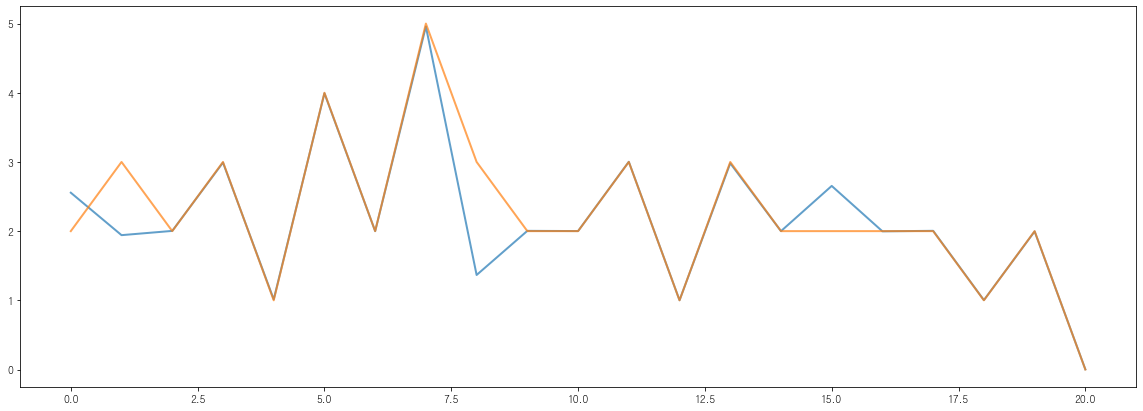

In [102]:
# 모델 성능 시각화

plt.pyplot.plot(model.predict(x_in),alpha = 0.7,linewidth = 2)
# 파란색 : 예측값
# 주황색 : 실제값
# 갈색 : 파란색과 주황색이 겹치는 부분
plt.pyplot.plot(x_out.values,alpha = 0.7,linewidth = 2)

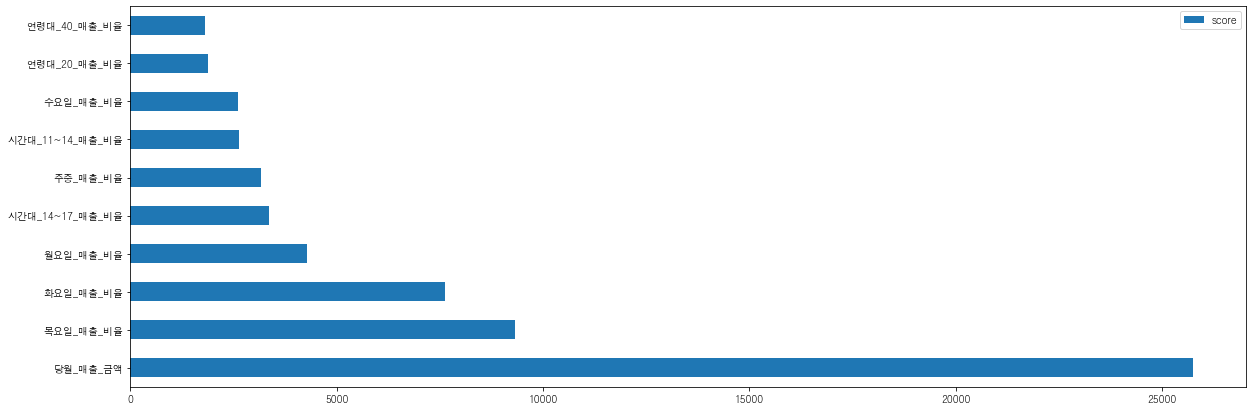

In [103]:
# 중요도 시각화

feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
plt.rcParams["figure.figsize"] = (20,7)
data_50 = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data_50[:10].plot(kind='barh')

In [99]:
model.predict(x_predict)

array([99.847374], dtype=float32)